In [2]:
# Importo librerías necesarias

from ipynb.fs.defs.aux_functions import *
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ipywidgets import interact

c:\Users\PC\anaconda3\envs\imaging\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\PC\anaconda3\envs\imaging\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\PC\anaconda3\envs\imaging\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\PC\anaconda3\envs\imaging\lib\site-packages\tensorflow\python\frame

In [13]:
# Determino qué voy a procesar y de qué manera

# to_process = None #["3-1", "7-1", "17-1"] # cambiar a None si quiero procesar todo
# fish_interval = (0, 155)
# exp = "OLED-AUD-9"
# not_process = []

In [3]:
# Guardo los directorios que voy a usar (cambiar si estoy en otra compu o si cambio de lugar algo)

# drive_dir = r"G:\My Drive\Proyectos\Zebrafish Multisensory Integration/"
drive_dir = r"H:\My Drive\Valen Agulló\Habenula\Experimentos Violeta 2024"

#disk_dir = "D:/Nico/VIDEOS MICROSCOPIO/Microscopio confocal/"
disk_dir = r"C:\Users\PC\My Drive\Violeta"

#drive_dir = "L:/My Drive/Multimodal Integration/"
#disk_dir = "F:/Users/Nicolas/Desktop/REGISTROS CONFOCAL/"

data_dir = drive_dir + "Audiovisual Perception Optic Tectum - Confocal Calcium Imaging\Data"
# areas_dir = disk_dir + "resultados OLED AUD 9"
# video_dir = disk_dir + "registros/2023/OLED AUD 9"

areas_dir = disk_dir 
video_dir = disk_dir 

res_dir = areas_dir

# fish_interval = (130, 155)

In [90]:
# Cargo tabla de datos del microscopio y la convierto en objetos de tipo Trial con toda su información

os.chdir(disk_dir)

dataset = pd.read_excel("Solo videos habenula 11_24.xlsx")
# dataset_2 = pd.read_excel("Habenula.xlsx", sheet_name=1)
print(dataset.shape)

trials = load_dataset(dataset, verbose = False)
# print(len(trials))

(1120, 33)


In [89]:
sorted_t[4]

{1: [<ipynb.fs.defs.aux_functions.Trial at 0x19f971e3448>,
  <ipynb.fs.defs.aux_functions.Trial at 0x19f970de5c8>]}

In [5]:
# Ordeno los trials en un diccionario que está separado por exp, fecha, pez, area 
factors = ["Exp", "Fecha", "Pez", "Area_num"]
sorted_t = sort_trials(trials, factors = factors, verbose = False)

# sorted_t = sorted_t[exp]

# print_sorted(sorted_t, factors[1:])

In [5]:
# trials = unroll_dict(sorted_t)
# print(len(trials))

# new_trials = []

# for trial in trials:
#     if trial.pez >= fish_interval[0] and trial.pez <= fish_interval[1]:
#         new_trials.append(trial)

# trials = new_trials

# print(len(trials))

500
0


In [5]:
#Selecciono trial con cierta región
for trial in trials:
    region_list = trial.region.split("+")
    
    # new_list = []
    # for region in region_list:
    #     if region != "Hb":
    #         new_list.append(region)
    #     else:
    #         new_list.append("Tectum_neuropil")
    #         new_list.append("Tectum_PVL")
    
    # trial.region_list = new_list
    trial.region_list = region_list


In [6]:
#Valen: Ubico en una carpeta todos los archivos con un sufijo dado y guardo nombre y ulr, después los levanto 
def listar_archivos(carpeta, sufijo):
    #Ubico en una carpeta todos los archivos con un sufijo dado y guardo nombre y ulr, después los levanto 
    archivos = []
    
    # Recorre todos los archivos en la carpeta especificada
    for archivo in os.listdir(carpeta):
        # Verifica si el archivo tiene el sufijo especificado
        if archivo.endswith(sufijo):
            # Guarda el nombre del archivo y su ruta completa
            ruta_completa = os.path.join(carpeta, archivo)
            archivos.append((archivo, ruta_completa))
    
    return archivos
#Valen: busca el archivo con el nombre que le das en todas las carpetas de la ruta base.
def buscar_archivo(nombre_archivo, ruta_base):
    # Recorremos todas las carpetas y archivos dentro de la ruta base
    for root, dirs, files in os.walk(ruta_base):
        # Si el archivo está en la lista de archivos en esta carpeta
        if nombre_archivo in files:
            # Retornamos la ruta completa al archivo
            return os.path.join(root, nombre_archivo)
    
    # Si no se encuentra, retornamos un mensaje indicando que no existe
    return f'Archivo {nombre_archivo} no encontrado en {ruta_base}'

# Definir el nombre del archivo y la ruta base

ruta_base = 'D:\\Videos Confocal Valen'


In [9]:
factors = ["Pez", "Area_num"]
sorted_t = sort_trials(trials, factors = factors)

templados_ulr_do = listar_archivos(r'C:\Users\PC\Desktop\Mascaras templados', 'png')
templados_ulr = []
for i in templados_ulr_do:
    if 'templados' in i[0] and 'png' in i[0]:
        templados_ulr.append(i)
# Ordenar la lista por el número presente en el primer elemento de cada tupla
templados_ulr = sorted(templados_ulr, key=lambda x: int(x[0].split('_')[0]))
templados_ulr_posta = []
Pez_a_ver = []
for i in templados_ulr:
    if int(i[0].split('_')[0]) in sorted_t.keys():
        Pez_a_ver.append(int(i[0].split('_')[0]))
        templados_ulr_posta.append(i)

Pez: 1 | Area_num: 1
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Pez: 2 | Area_num: 1
[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
Pez: 4 | Area_num: 1
[41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
Pez: 5 | Area_num: 1
[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
Pez: 6 | Area_num: 1
[81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
Pez: 7 | Area_num: 1
[101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]
Pez: 8 | Area_num: 1
[121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140]
Pez: 9 | Area_num: 1
[141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160]
Pez: 10 | Area_num: 1
[161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180]
Pez: 11 |

In [19]:
sorted_t[44][1][0].__dict__.keys()

dict_keys(['data', 'trial', 'fecha', 'microscopio', 'pez', 'area', 'region', 'width', 'height', 'fps', 'nframes', 'total_time', 'loom_end_time', 'loom_vanish_time', 'sound_time', 'vis', 'aud'])

In [25]:
print(sorted_t[44][1][2].fecha)

2024-11-13


In [9]:

areas = {}

for pez in sorted_t:
    #Si queremos levantar un grupo en particular de peces.
    if pez in Pez_a_ver:
        for area in sorted_t[pez]:
            print(pez)
            areas[str(pez) + "-" + str(area)] = Area(pez, area)
            areas[str(pez) + "-" + str(area)].set_trials(sorted_t[pez][area])
    # if pez <= 20:
    #     for area in sorted_t[pez]:
    #         print(pez)
    #         areas[str(pez) + "-" + str(area)] = Area(pez, area)
    #         areas[str(pez) + "-" + str(area)].set_trials(sorted_t[pez][area])

for key in areas:
    print(areas[key].to_string())

1
2
4
5
6
7
8
10
11
12
13
14
15
17
18
19
20
21
22
23
24
25
26
27
PEZ 1 | AREA 1 | 20 trials.
PEZ 2 | AREA 1 | 20 trials.
PEZ 4 | AREA 1 | 20 trials.
PEZ 5 | AREA 1 | 20 trials.
PEZ 6 | AREA 1 | 20 trials.
PEZ 7 | AREA 1 | 20 trials.
PEZ 8 | AREA 1 | 20 trials.
PEZ 10 | AREA 1 | 20 trials.
PEZ 11 | AREA 1 | 20 trials.
PEZ 12 | AREA 1 | 20 trials.
PEZ 13 | AREA 1 | 20 trials.
PEZ 14 | AREA 1 | 20 trials.
PEZ 15 | AREA 1 | 20 trials.
PEZ 17 | AREA 1 | 20 trials.
PEZ 18 | AREA 1 | 20 trials.
PEZ 19 | AREA 1 | 20 trials.
PEZ 20 | AREA 1 | 20 trials.
PEZ 21 | AREA 1 | 20 trials.
PEZ 22 | AREA 1 | 20 trials.
PEZ 23 | AREA 1 | 20 trials.
PEZ 24 | AREA 1 | 20 trials.
PEZ 25 | AREA 1 | 20 trials.
PEZ 26 | AREA 1 | 20 trials.
PEZ 27 | AREA 1 | 20 trials.


In [10]:

# templados_ulr = listar_archivos(r'C:\Users\PC\Desktop\Templados Violeta', 'png')
# templados_ulr_czi= listar_archivos(r'C:\Users\PC\Desktop\Templados Violeta', 'czi')
templados = {}
ulr_czi_dic ={} 
#Armo un dic con el pez y el templado, pongo así raro el orden para que coincida la lista con los templados. 
for j,arch in zip(Pez_a_ver,templados_ulr_posta) :
    templados[j]=cv2.imread(arch[1], cv2.IMREAD_GRAYSCALE)
    ulr_czi_dic[j]=buscar_archivo(arch[0][:-7]+'.czi', ruta_base)

In [89]:
# list(areas.keys())
# ulr_czi_dic
# areas

{'1-1': <ipynb.fs.defs.aux_functions.Area at 0x25c8dd81048>,
 '2-1': <ipynb.fs.defs.aux_functions.Area at 0x25c8dd53588>,
 '4-1': <ipynb.fs.defs.aux_functions.Area at 0x25c8dd53488>,
 '5-1': <ipynb.fs.defs.aux_functions.Area at 0x25c8dd53988>,
 '6-1': <ipynb.fs.defs.aux_functions.Area at 0x25c8dd7b248>,
 '7-1': <ipynb.fs.defs.aux_functions.Area at 0x25c8dd7b708>,
 '8-1': <ipynb.fs.defs.aux_functions.Area at 0x25c8dd7b148>,
 '9-1': <ipynb.fs.defs.aux_functions.Area at 0x25c8dd4e888>,
 '10-1': <ipynb.fs.defs.aux_functions.Area at 0x25c8dd4eb48>,
 '11-1': <ipynb.fs.defs.aux_functions.Area at 0x25c8dd4ebc8>,
 '12-1': <ipynb.fs.defs.aux_functions.Area at 0x25c8dd4ea48>,
 '13-1': <ipynb.fs.defs.aux_functions.Area at 0x25c8dd8dc88>,
 '14-1': <ipynb.fs.defs.aux_functions.Area at 0x25c8dd8d548>,
 '15-1': <ipynb.fs.defs.aux_functions.Area at 0x25c8dd8d388>,
 '17-1': <ipynb.fs.defs.aux_functions.Area at 0x25c8dd8d308>,
 '18-1': <ipynb.fs.defs.aux_functions.Area at 0x25c8dd8d148>,
 '19-1': <ipynb.

In [35]:
# def set_template(self, template, factor = None):
#     self.template = template
#     print("Esta es la nueva funcion")
#     t = self.trials[0]
#     w = int(t.data["Ancho"])
#     h = int(t.data["Alto"])
#     if factor is None:
#         self.template_small = cv2.resize(self.template, dsize=(h, w))

#         self.factor = self.template.shape[0] / self.template_small.shape[0]
#     else:
#         self.factor = factor
#         self.template_small = cv2.resize(self.template, dsize=(h, w))

# for key in areas.keys():
#     areas[key].set_template = set_template.__get__(areas[key], areas[key].__class__)

1-1 (512, 1024)


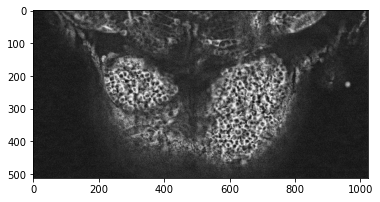

2-1 (512, 1024)


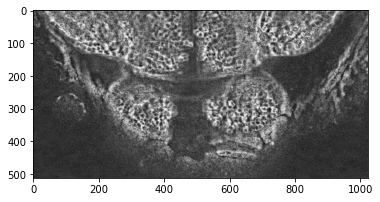

4-1 (512, 1024)


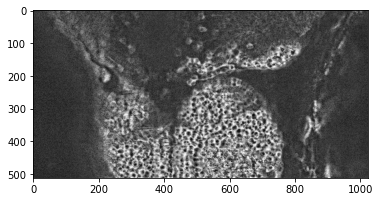

5-1 (512, 1024)


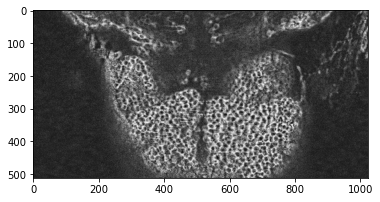

6-1 (512, 1024)


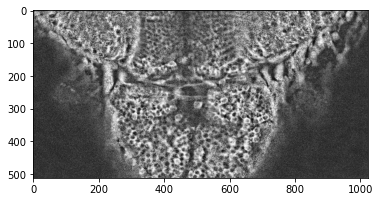

7-1 (512, 1024)


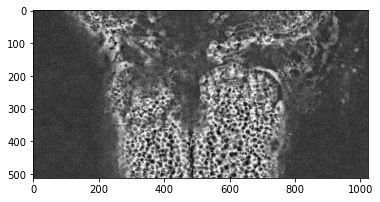

8-1 (512, 1024)


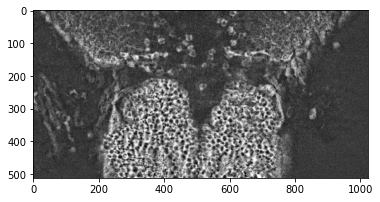

10-1 (512, 1024)


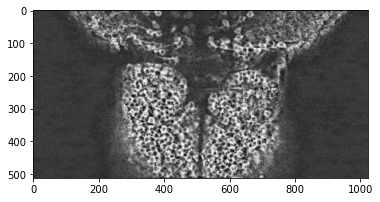

11-1 (512, 1024)


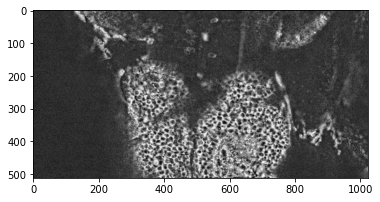

12-1 (512, 1024)


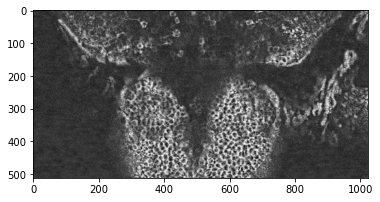

13-1 (512, 1024)


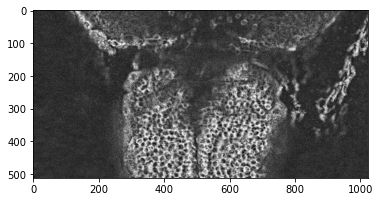

14-1 (512, 1024)


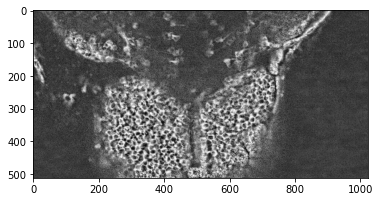

15-1 (512, 1024)


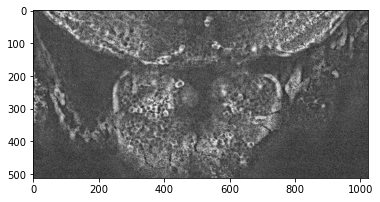

17-1 (512, 1024)


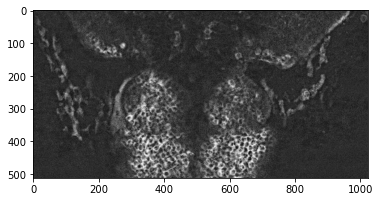

18-1 (512, 1024)


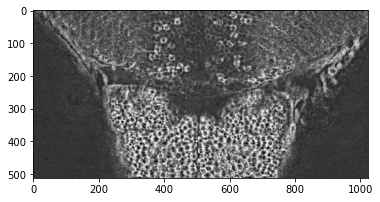

19-1 (512, 1024)


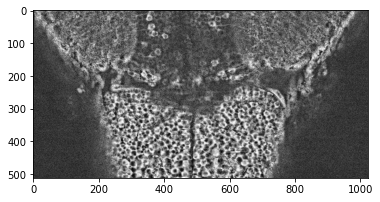

20-1 (512, 1024)


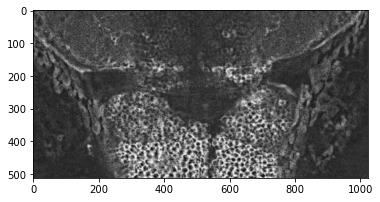

21-1 (512, 1024)


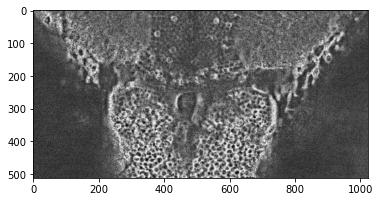

22-1 (512, 1024)


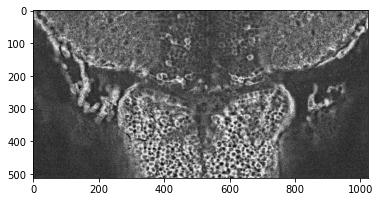

23-1 (512, 1024)


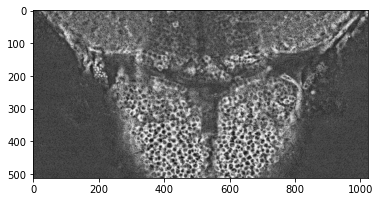

24-1 (512, 1024)


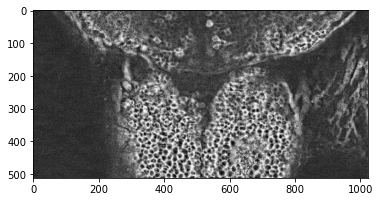

25-1 (512, 1024)


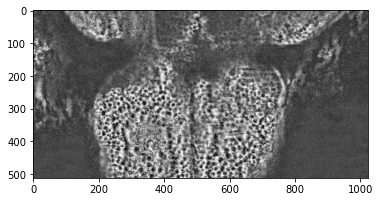

26-1 (512, 1024)


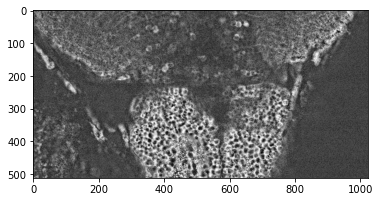

27-1 (512, 1024)


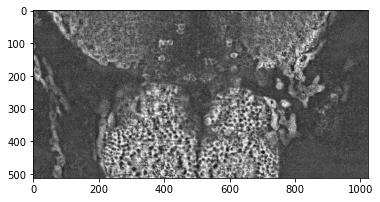

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


In [11]:
# Para cada área de cada pez, cargo su templado, si existe
# direc = 'C:\\Users\\PC\\Desktop\\Templados Violeta'
for key in list(areas.keys()):
    area = areas[key]

    # t = load_czi(direc, ulr_czi_dic[area.pez], file_type = "image")

    area.set_template(templados[area.pez], 4)

for key in areas:
    print(key, "None" if areas[key].template is None else areas[key].template.shape)
    plt.figure(figsize = (6,6))
    plt.imshow(areas[key].template, cmap = "gray")
    plt.show()


for key in areas:
    area = areas[key]
    print(area.factor)

In [ ]:
i=0
for key in areas:
    if i>51:    
        print(areas[key].regions, )
        polygons_per_area, midline_points, subtemplates, finished = define_sub_areas(areas[key].template, areas[key].regions)
        
        if not finished:
            break
        
        areas[key].set_polygons(polygons_per_area, subtemplates)

        areas[key].midline_points = midline_points
    i+=1
    

['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']
['Hb', 'palium']


In [14]:
new_areas = {}
for key in areas:
    if hasattr(areas[key], "midline_points"):
        new_areas[key] = areas[key]
        
areas = new_areas

print(areas.keys())

dict_keys(['1-1', '2-1', '4-1', '5-1', '6-1', '7-1', '8-1', '10-1', '11-1', '12-1', '13-1', '14-1', '15-1', '17-1', '18-1', '19-1', '20-1', '21-1', '22-1', '23-1', '24-1', '25-1', '26-1', '27-1'])


In [17]:
def set_rois(area, grid, contours, centers):
    area.grids = {}
    area.contours = {}
    area.centers = {}

    area.contours_small = {}
    area.centers_small = {}

    contours = np.array(contours, dtype="object")

    for key in area.polygons_per_area_small:
        polygons = area.polygons_per_area_small[key]

        grid_centers = []

        for cell in grid:
            centerx = (cell[0] + cell[2])/2
            centery = (cell[1] + cell[3])/2

            grid_centers.append([centerx, centery])

        cells_in_area = np.zeros((len(grid_centers),)).astype('bool')

        for polygon in polygons:
            are_inside = points_in_polygon(grid_centers, polygon)
            cells_in_area = cells_in_area | are_inside

        area.grids[key] = grid[cells_in_area]


    for key in area.polygons_per_area:
        polygons = area.polygons_per_area[key]

        cells_in_area = np.zeros((len(centers),)).astype('bool')

        for polygon in polygons:
            are_inside = points_in_polygon(centers, polygon)
            cells_in_area = cells_in_area | are_inside

        area.centers[key] = centers[cells_in_area]
        area.contours[key] = contours[cells_in_area]
        
        area.centers_small[key] = (area.centers[key] / area.factor).astype('int')
        area.contours_small[key] = []
        for cnt in area.contours[key]:
            area.contours_small[key].append((cnt/area.factor).astype('int'))

In [18]:
from scipy.ndimage import center_of_mass
def closest_to_centroid(matrix, graf=False):
    """
    Encuentra el punto más cercano al centro geométrico de la región de True en una matriz booleana.
    
    Parámetros:
    matrix (numpy.ndarray): Matriz booleana de entrada.
    graf (bool): Si es True, grafica la matriz y los puntos. False por defecto.
    
    Retorna:
    tuple: Coordenadas del punto más cercano al centro geométrico (i, j).
    tuple: Coordenadas del centro geométrico (i, j).
    """
    # Calcular el centro de masa de la región True
    center_of_mass_coords = center_of_mass(matrix)
    # Convertir a coordenadas enteras para encontrar el punto más cercano
    center_of_mass_coords = np.round(center_of_mass_coords).astype(int)

    # Inicializar variables para almacenar la mínima distancia y el punto más cercano
    min_distance = np.inf
    closest_point = None

    # Recorrer la matriz para encontrar el punto True más cercano al centro de masa
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix[i, j]:
                # Calcular la distancia euclidiana
                distance = np.sqrt((i - center_of_mass_coords[0])**2 + (j - center_of_mass_coords[1])**2)
                if distance < min_distance:
                    min_distance = distance
                    closest_point = (i, j)

    # Si graf=True, graficar la matriz y el punto más cercano al centro geométrico
    if graf:
        plt.imshow(matrix, cmap='gray', origin='lower')
        plt.scatter(closest_point[1], closest_point[0], color='red', label='Punto más cercano',s=20, alpha=.5)
        plt.scatter(center_of_mass_coords[1], center_of_mass_coords[0], color='blue', label='Centro geométrico', s=1)
        plt.legend()
        plt.show()

    return closest_point, np.array(center_of_mass_coords)

def obtener_contorno(imagen):
    # np.where devuelve los índices donde la imagen tiene valor 1 (los contornos)
    y, x = np.where(imagen == 1)  # y son las filas, x son las columnas
    return np.array(list(zip(x, y)))  # Combina las coordenadas en pares (x, y)


# L_violeta = listar_archivos(r'C:\Users\PC\Desktop\Templados Violeta', 'npy')

# centroids_violeta =[]
# contornos_violeta = []
# D_violeta = []
# for arch in L_violeta:
#     if arch[0]!='regiones.npy':
#         data_cruda = np.load(arch[1], allow_pickle=True)
#         D_violeta.append(data_cruda.item())
# for dic in D_violeta:
#     centroids = []
#     contornos= []
#     for i in range(len(dic['colors'])):
#         closest_point, centroid = closest_to_centroid(dic['masks']==i+1)
#         contornos.append(obtener_contorno(dic['outlines']==i+1))
#         centroids.append(closest_point)
#     centroids_violeta.append(np.array(centroids))
#     contornos_violeta.append(np.array(contornos))

In [17]:
for j,arch in zip(Pez_a_ver,templados_ulr) :
    templados[j]=cv2.imread(arch[1], cv2.IMREAD_GRAYSCALE)
    ulr_czi_dic[j]=buscar_archivo(arch[0][:-7]+'.czi', ruta_base)

In [21]:
templados_ulr[0][1][:-4]+'_seg.npy'

'C:\\Users\\PC\\Desktop\\Mascaras templados\\1_NeuroD_templado1-O0_seg.npy'

In [22]:
ult_templados_cellpose = r'C:\Users\PC\Desktop\Mascaras templados'
centroids_cellpose =[]
contornos_cellpose = []
D_cellpose = []
# for arch in L_violeta:
for arch in templados_ulr_posta:
    # if arch[0] !='regiones.npy':
    data_cruda = np.load(arch[1][:-4]+'_seg.npy', allow_pickle=True)
    D_cellpose.append(data_cruda.item())

for dic in D_cellpose:
    centroids = []
    contornos= []
    for i in range(len(dic['colors'])):
        closest_point, centroid = closest_to_centroid(dic['masks']==i+1)
        contornos.append(obtener_contorno(dic['outlines']==i+1))
        centroids.append(closest_point)
    centroids_cellpose.append(np.array(centroids))
    contornos_cellpose.append(np.array(contornos))

c:\Users\PC\anaconda3\envs\imaging\lib\site-packages\ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [29]:
#Datos Viole
# centroids_violeta_ordenados = centroids_violeta[3:] + centroids_violeta[:3]
# contornos_violeta_ordenados = contornos_violeta[3:] + contornos_violeta[:3]

#Datos Cellpose
# centroids_cellpose_ordenados = centroids_cellpose[3:] + centroids_cellpose[:3]
# contornos_cellpose_ordenados = contornos_cellpose[3:] + contornos_cellpose[:3]

In [23]:
# Aplico algoritmos de segmentación de manera interactiva. En la ventana que se abre tengo que elegir parámetros.
# Cuando me gusta el resultado, toco escape y me lleva a la siguiente segmentación.

N_cells = 64

all_contours = {}
all_centers = {}

for j, key in enumerate(areas):
    area = areas[key]
    grid = get_grid(area.template_small, int(area.template_small.shape[0]/N_cells))
    #Poner acá mis contornos y centros
    #Data Viole
    # contours, centers = contornos_violeta_ordenados[j], np.array([sublist[::-1] for sublist in centroids_violeta_ordenados[j]] )
    #Data Cellpose
    contours, centers = contornos_cellpose[j], np.array([sublist[::-1] for sublist in centroids_cellpose[j]] )

    # contours, centers = contornos_violeta[j], centroids_violeta[j]
    
    set_rois(area, grid, contours, centers)
    
    all_contours[key] = contours
    all_centers[key] = centers
    

In [57]:
area.__dict__.keys()

dict_keys(['pez', 'n', 'trials', 'template', 'polygons_per_area', 'subtemplates', 'fecha', 'x', 'y', 'z', 'regions', 'template_small', 'factor', 'polygons_per_area_small', 'midline_points', 'grids', 'contours', 'centers', 'contours_small', 'centers_small'])

In [19]:
area.polygons_per_area_small['Hb'][0]

array([[ 69,  76],
       [ 74,  78],
       [ 88,  76],
       [ 99,  72],
       [106,  69],
       [110,  62],
       [110,  57],
       [106,  51],
       [101,  46],
       [ 95,  43],
       [ 84,  36],
       [ 78,  34],
       [ 65,  30],
       [ 59,  31],
       [ 55,  32],
       [ 53,  34],
       [ 52,  41],
       [ 52,  48],
       [ 52,  54],
       [ 53,  62],
       [ 59,  70]])

1-1


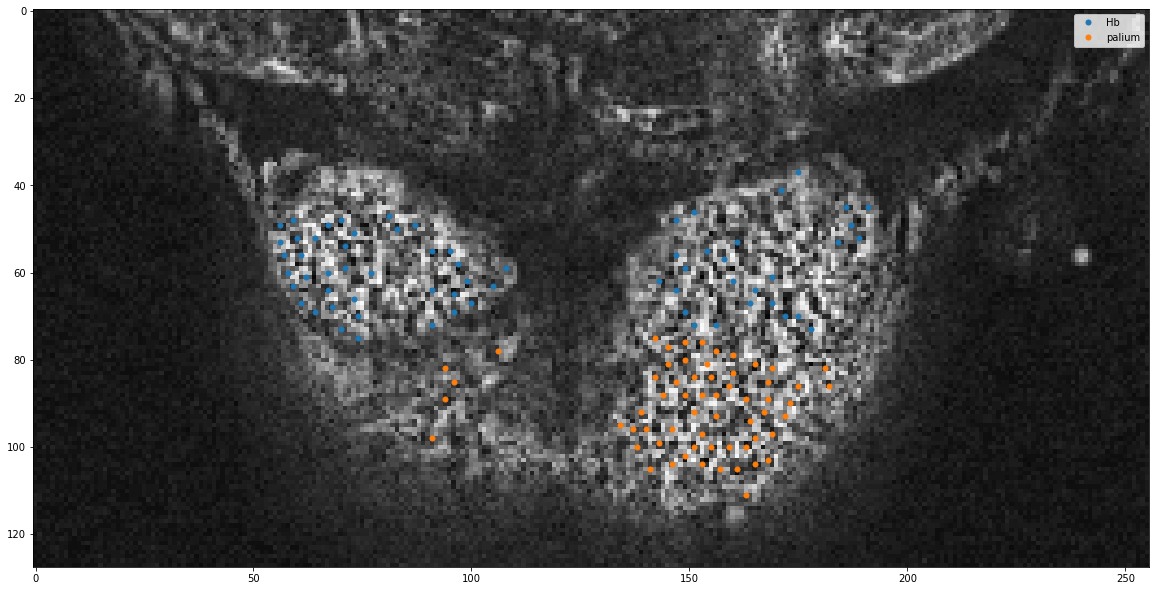

2-1


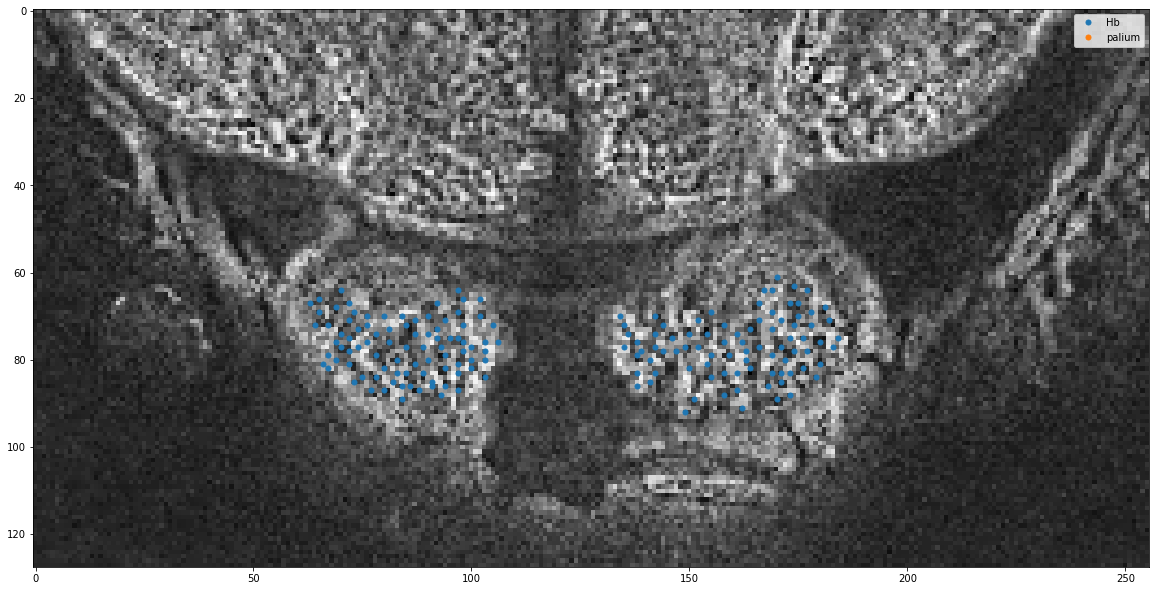

4-1


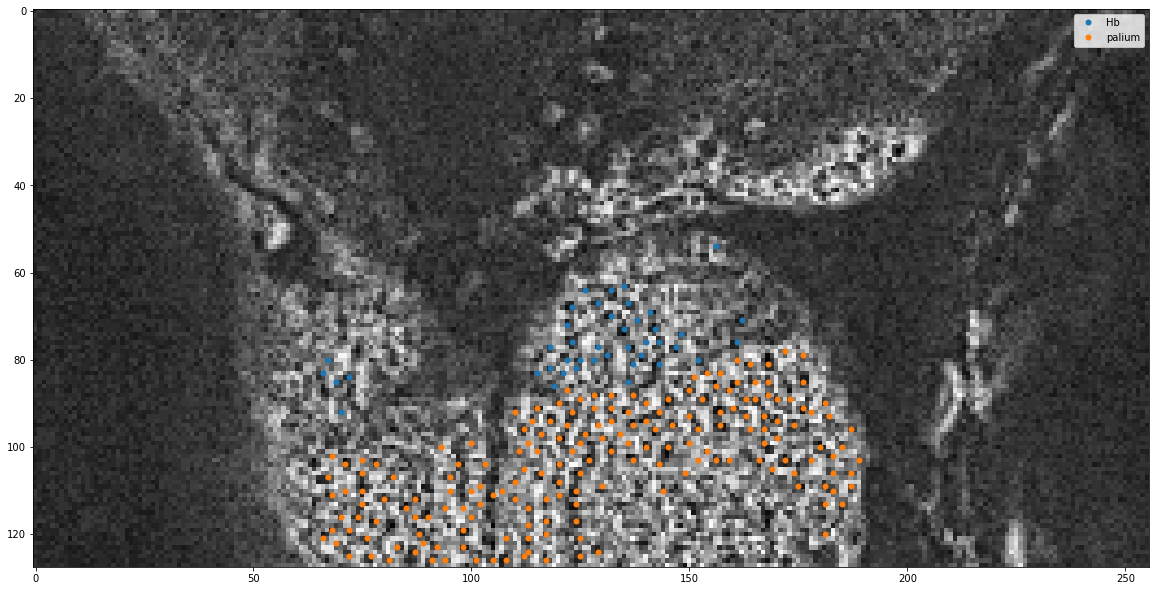

5-1


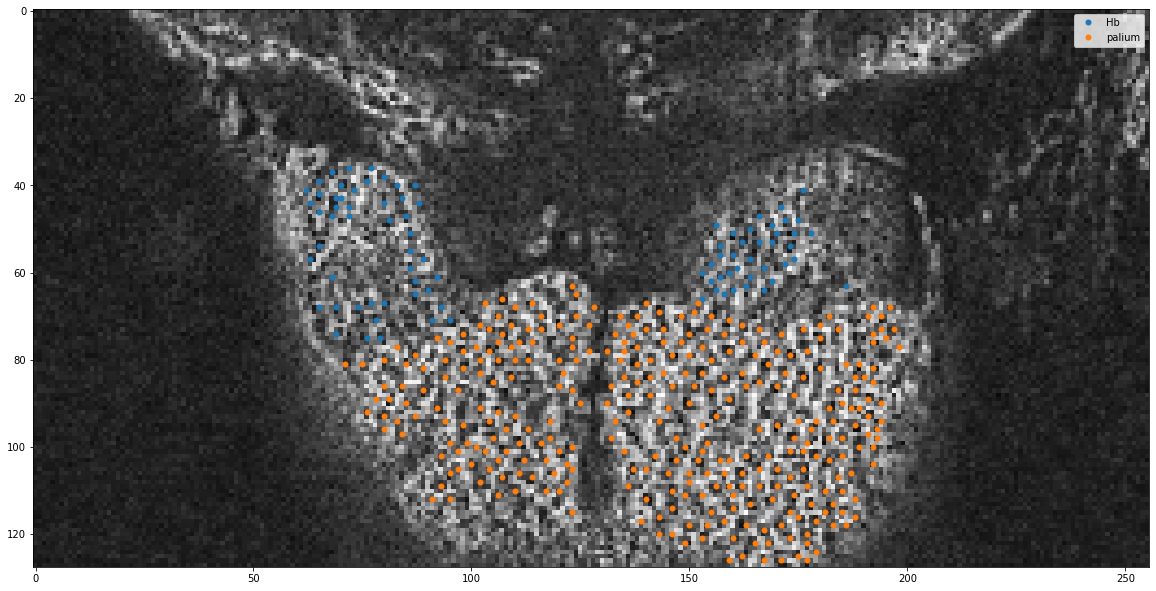

6-1


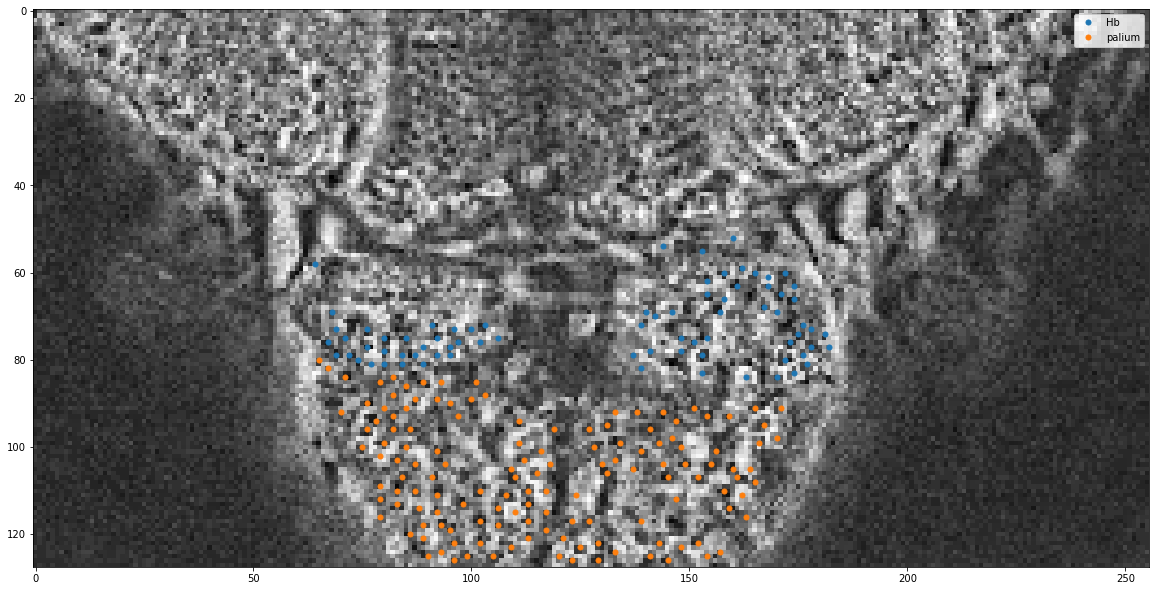

7-1


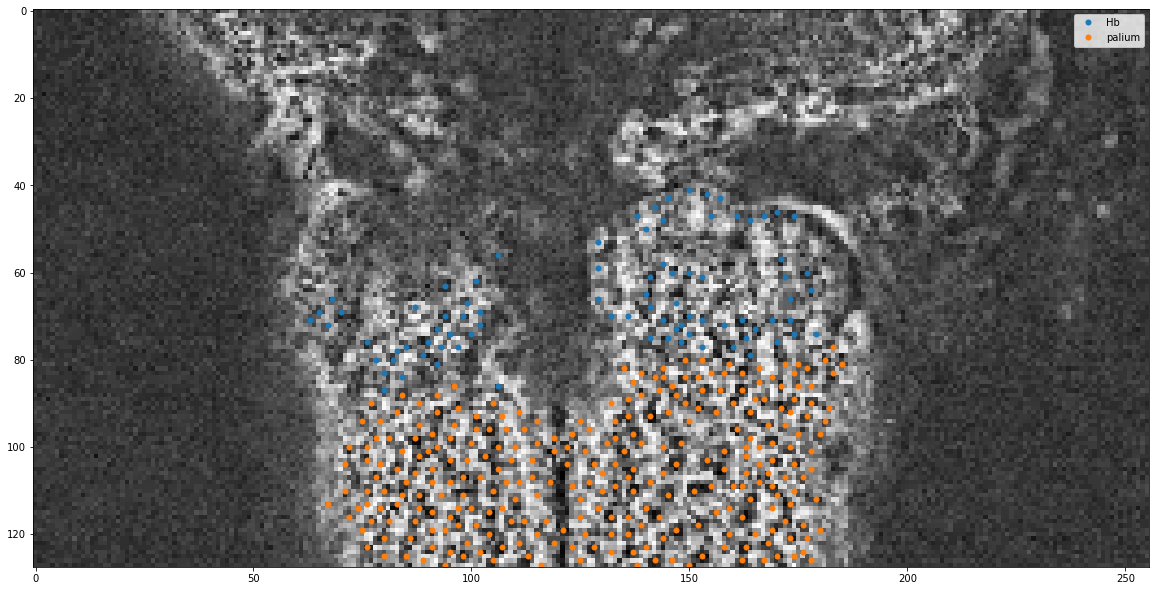

8-1


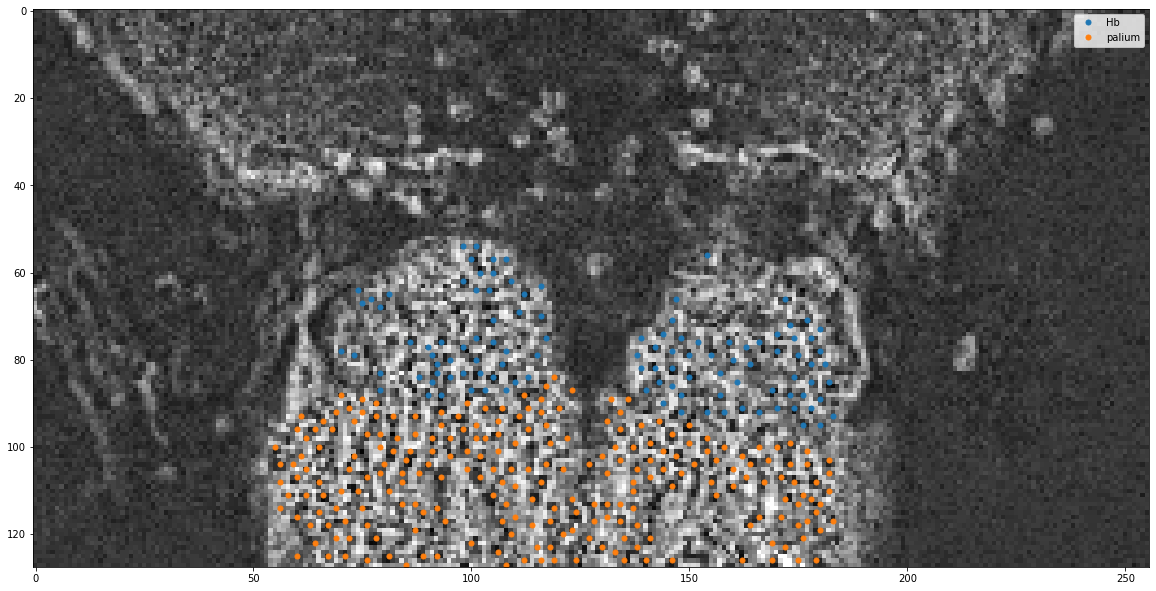

10-1


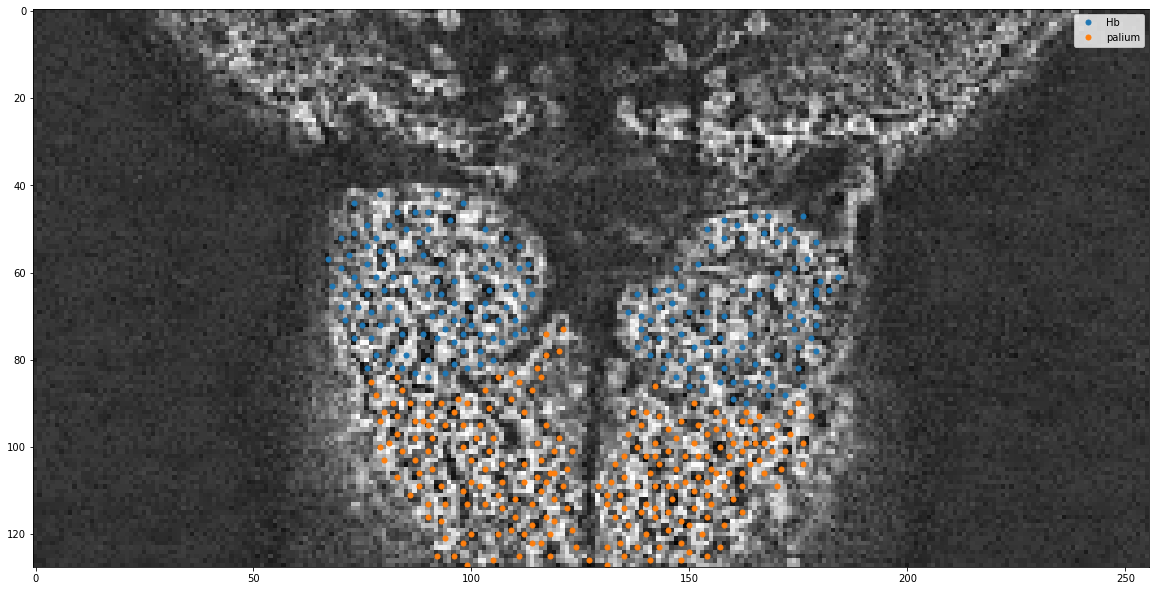

11-1


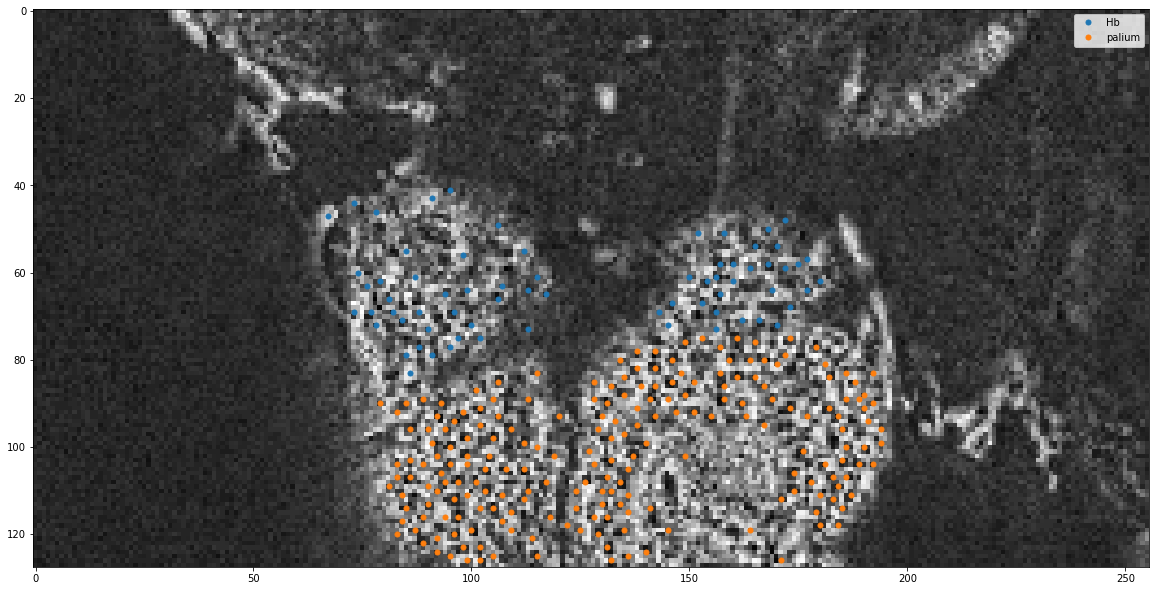

12-1


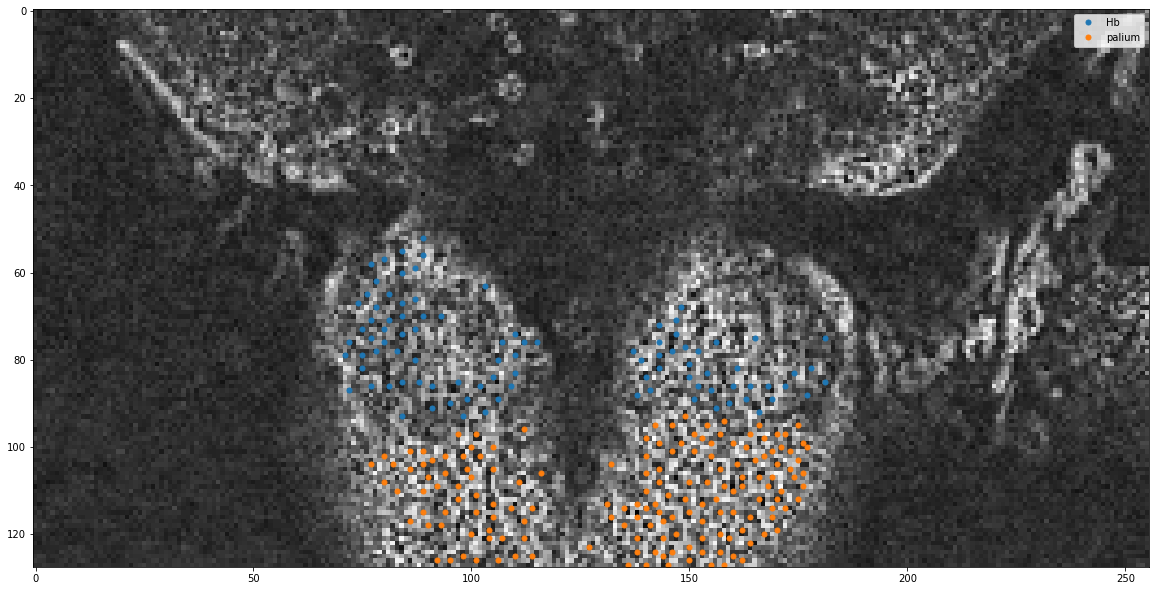

13-1


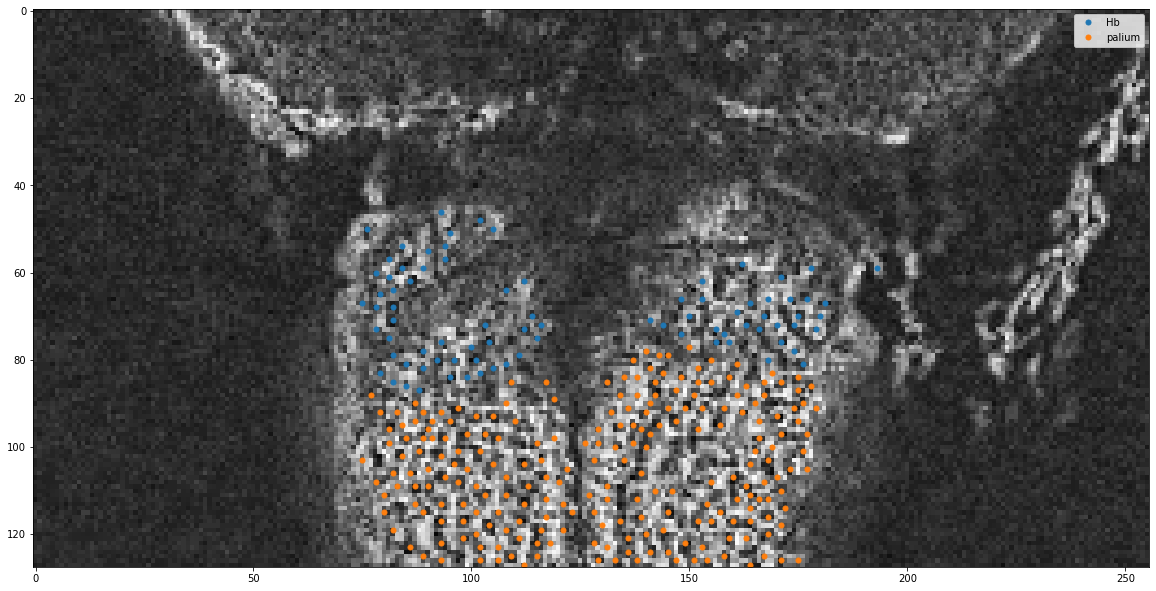

14-1


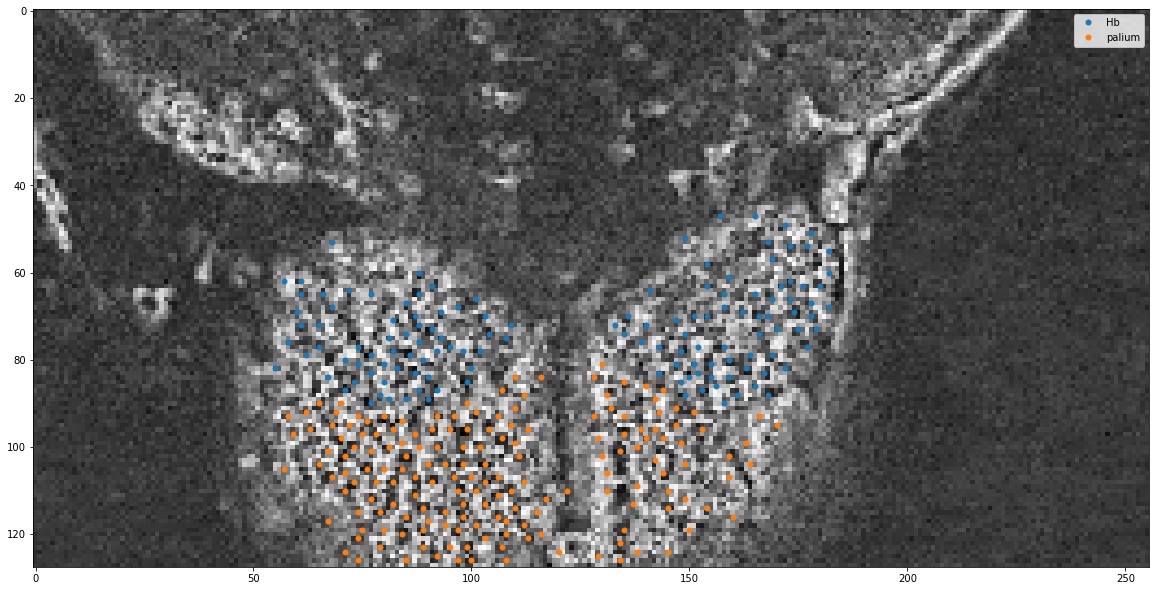

15-1


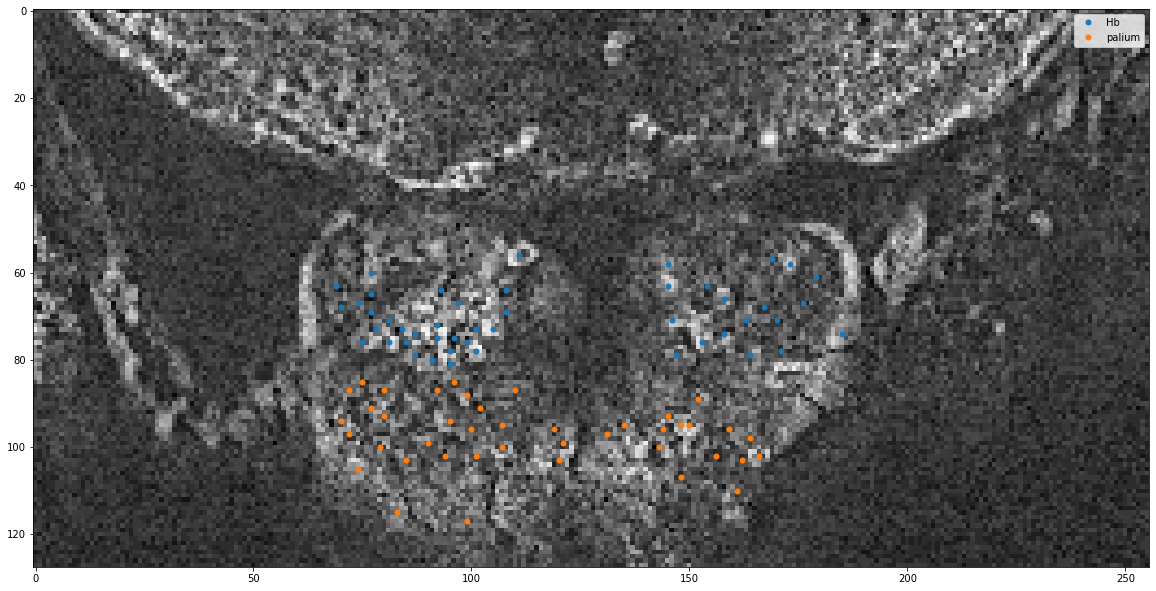

17-1


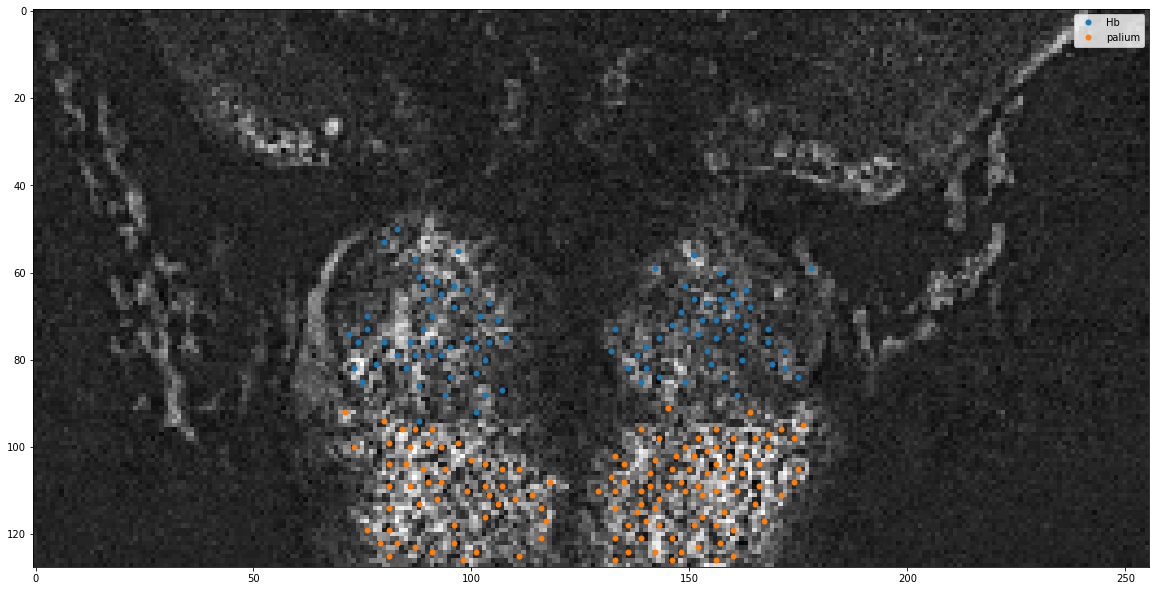

18-1


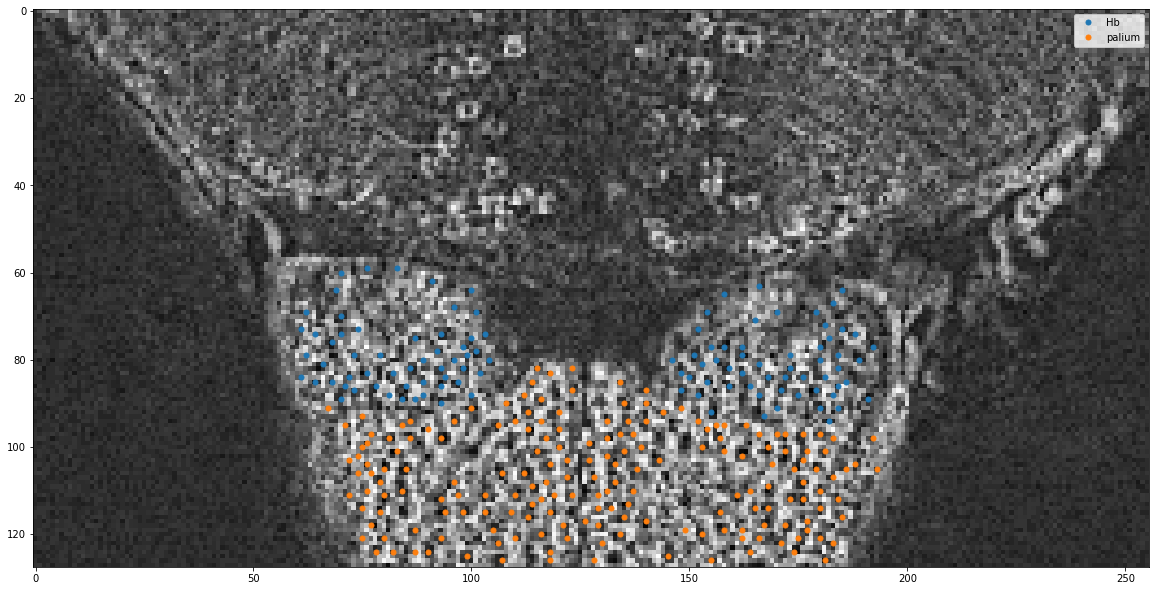

19-1


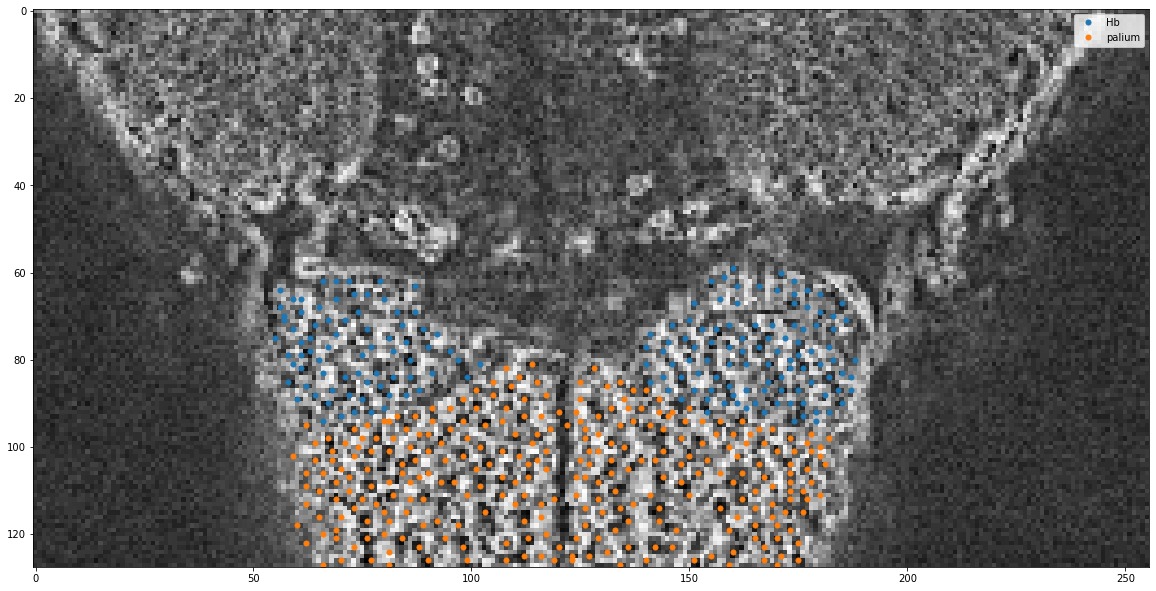

20-1


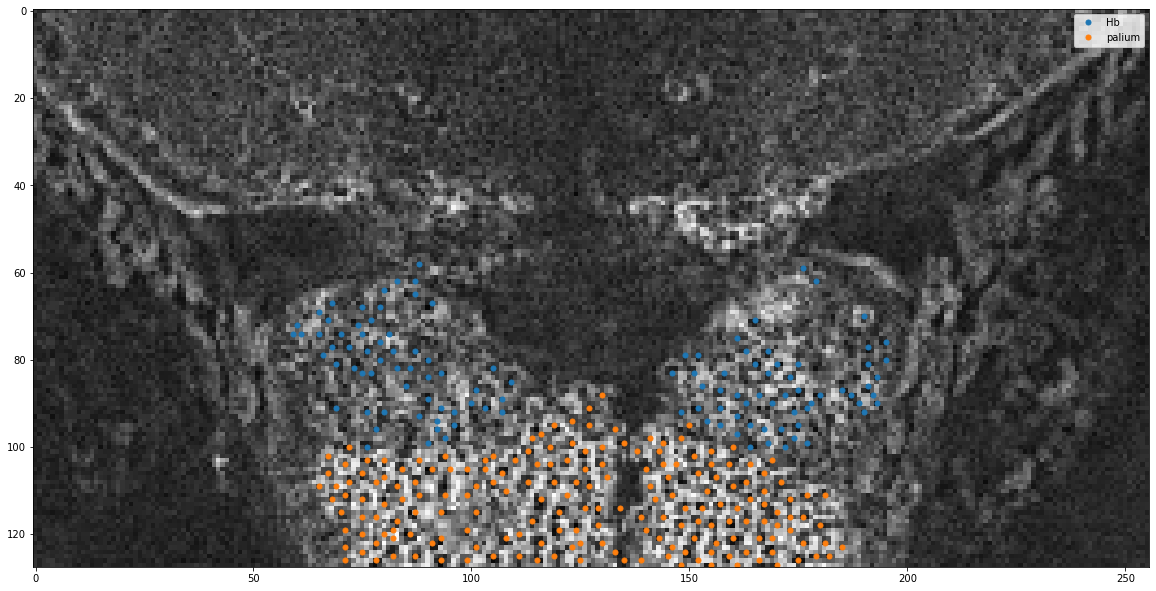

21-1


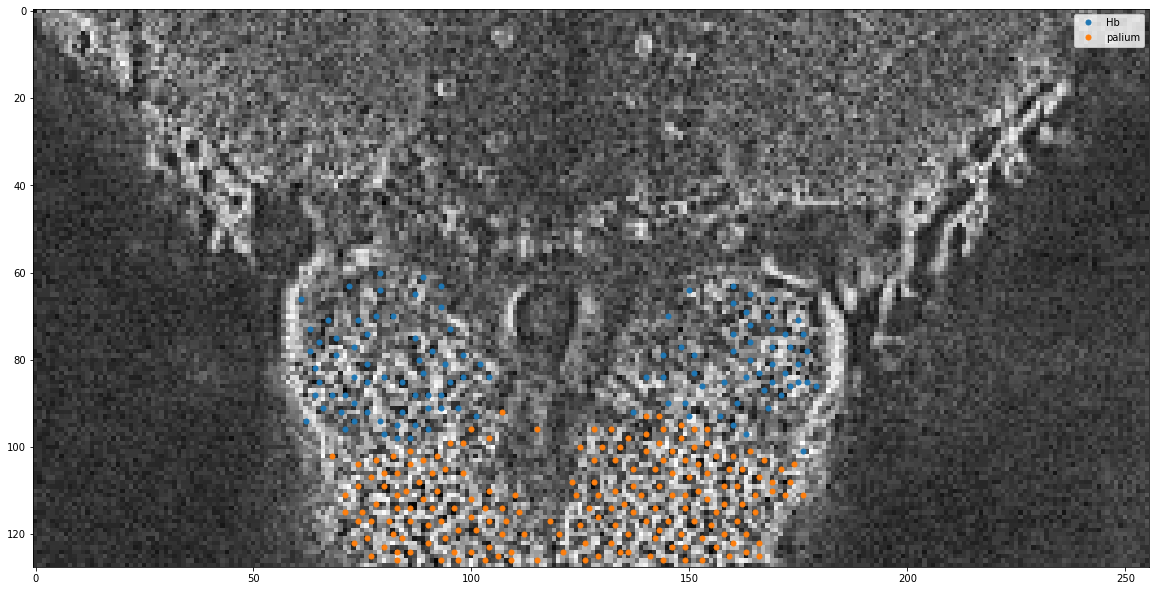

22-1


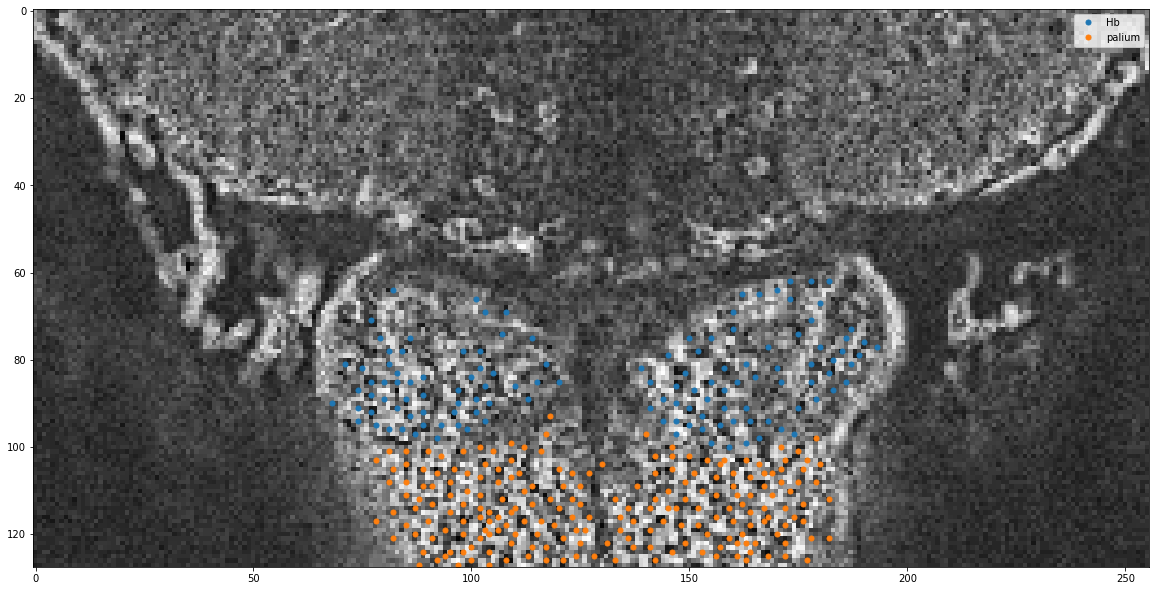

23-1


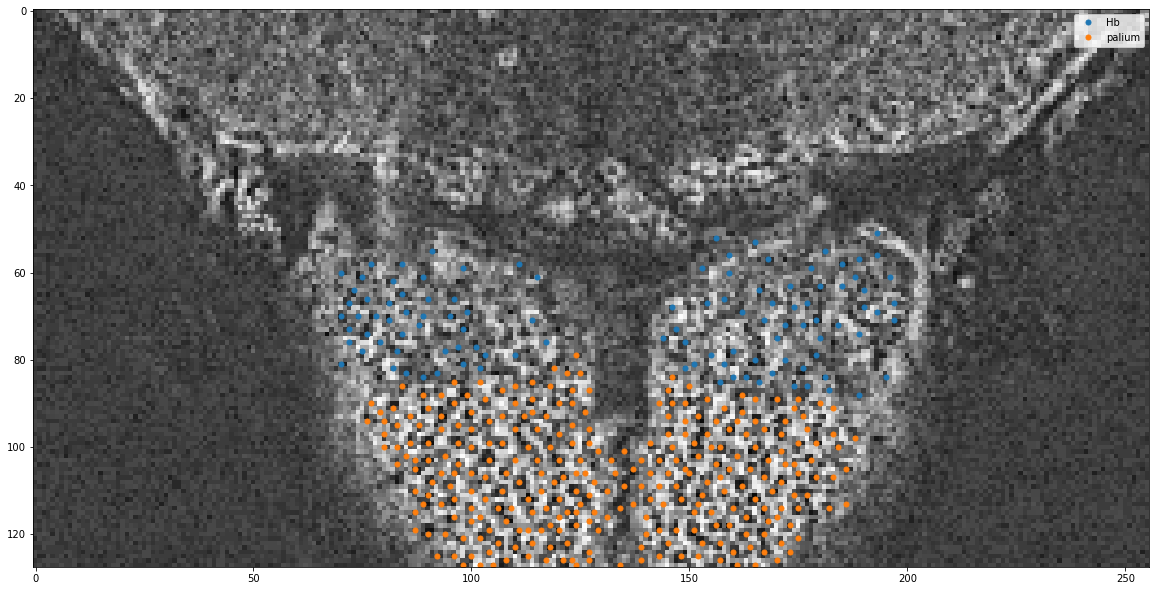

24-1


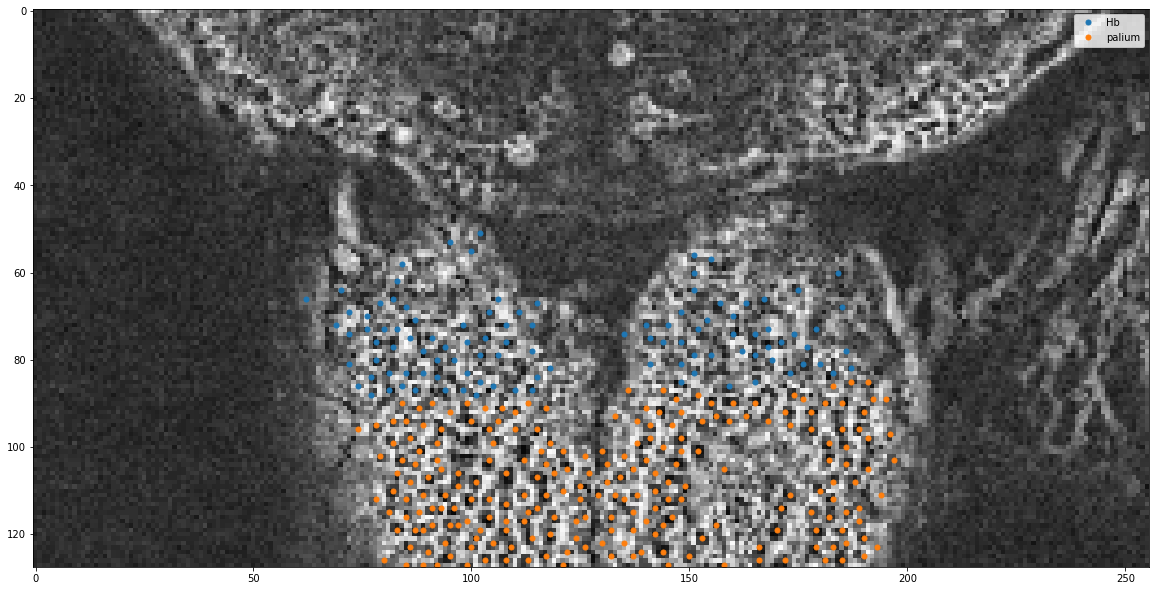

25-1


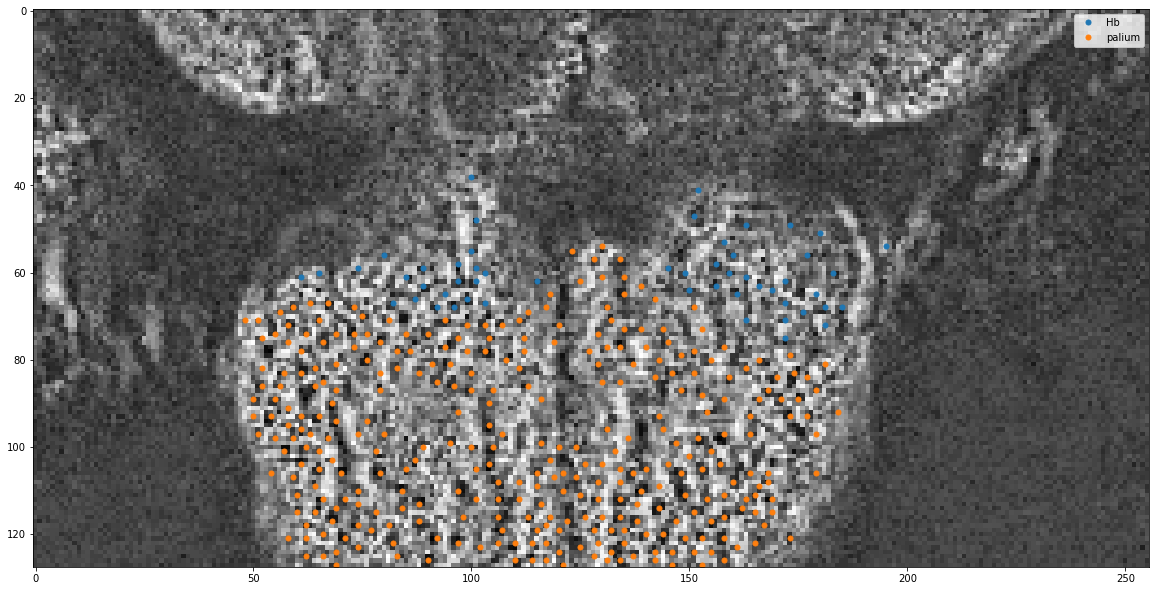

26-1


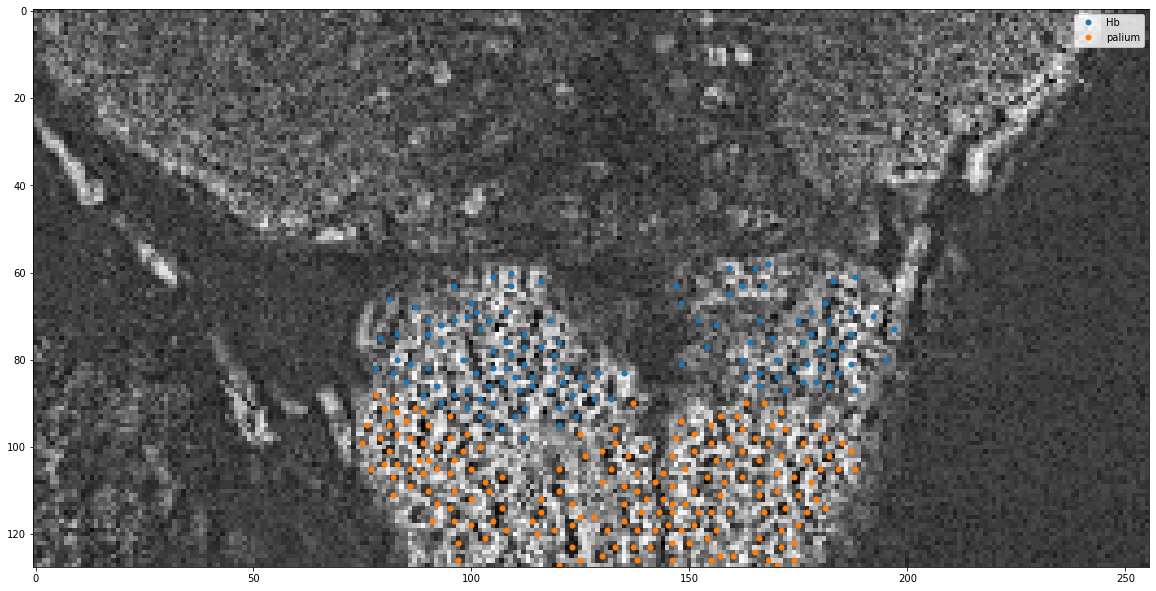

27-1


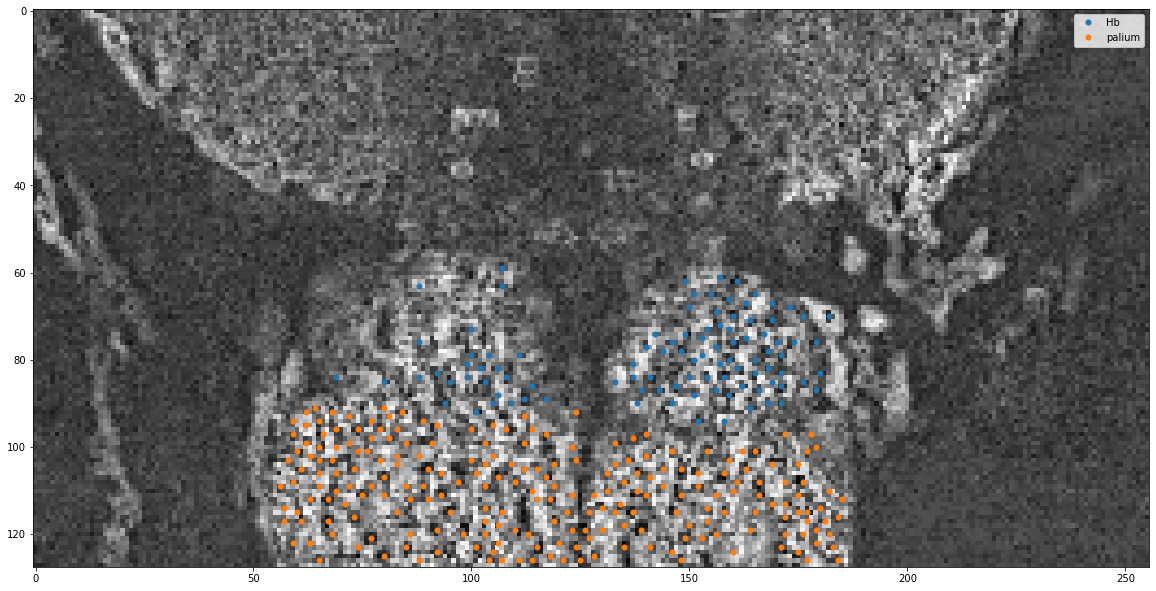

In [24]:
for key in areas:
    print(key)
    area = areas[key]
    plt.figure(figsize=(20,20))
    plt.imshow(cv2.resize(areas[key].template , (256, 128)), cmap='gray')
    for subarea in area.centers_small:
        centers_small = area.centers_small[subarea]
        plt.plot(centers_small[:,0], centers_small[:,1], "o", label = subarea, markersize=5)
    area.polygons_per_area_small
    plt.legend()
    plt.show()

In [34]:
def get_linear_fn(x1, y1, x2, y2):
    
    if x1 == x2:
        return x1, None
    
    a = (y2 - y1)/(x2 - x1)
    
    b = y1 - a*x1
    
    return a, b

for key in areas:
    if '28' not in key and '51' not in key : 
        area = areas[key]
        a, b = get_linear_fn(area.midline_points[0][0], area.midline_points[0][1], area.midline_points[1][0], area.midline_points[1][1])
        
        print(area.midline_points, a, b)
        
    #     plt.imshow(area.template, cmap="gray")
    #     plt.plot(area.midline_points[0][0], area.midline_points[0][1], "x",color="pink")
    #     plt.plot(area.midline_points[1][0], area.midline_points[1][1], "x",color="pink")
    #     plt.plot([area.midline_points[0][0], area.midline_points[1][0]],
    #              [a*area.midline_points[0][0]+b, a*area.midline_points[1][0]+b], "-", color="green")
    #     plt.show()
        
        area.grid_lefties = {}
        
        for region in area.grids:
            grid_centers_x = area.grids[region][:,0] + (area.grids[region][:,2] - area.grids[region][:,0])/2
            grid_centers_y = area.grids[region][:,1] + (area.grids[region][:,3] - area.grids[region][:,1])/2
            centers = np.array([grid_centers_x, grid_centers_y]).T * area.factor
            
            if b is not None:
                if a > 0:
                    area.grid_lefties[region] = centers[:,1] > centers[:,0]*a + b
                else:
                    area.grid_lefties[region] = centers[:,1] < centers[:,0]*a + b
            else:
                area.grid_lefties[region] = centers[:,0] < a

        area.roi_lefties = {}
        
        for region in area.centers:
            if b is not None:
                if a > 0:
                    area.roi_lefties[region] = area.centers[region][:,1] > area.centers[region][:,0]*a + b
                else:
                    area.roi_lefties[region] = area.centers[region][:,1] < area.centers[region][:,0]*a + b
            else:
                area.roi_lefties[region] = area.centers[region][:,0] < a

[(473, 508), (470, 0)] 169.33333333333334 -79586.66666666667
[(480, 506), (485, 2)] -100.8 48890.0
[(486, 511), (472, 2)] 36.357142857142854 -17158.571428571428
[(479, 510), (478, 1)] 509.0 -243301.0
[(491, 508), (488, 4)] 168.0 -81980.0
[(496, 508), (484, 1)] 42.25 -20448.0
[(521, 509), (528, 1)] -72.57142857142857 38318.71428571428
[(545, 508), (544, 3)] 505.0 -274717.0
[(553, 508), (529, 2)] 21.083333333333332 -11151.083333333332
[(541, 510), (552, 0)] -46.36363636363637 25592.727272727276
[(571, 508), (557, 0)] 36.285714285714285 -20211.142857142855
[(571, 508), (555, 0)] 31.75 -17621.25
[(521, 507), (525, 0)] -126.75 66543.75
[(538, 508), (531, 2)] 72.28571428571429 -38381.71428571429
[(532, 507), (521, 0)] 46.09090909090909 -24013.363636363636
[(518, 506), (521, 2)] -168.0 87530.0
[(533, 508), (511, 0)] 23.09090909090909 -11799.454545454544
[(532, 510), (514, 0)] 28.333333333333332 -14563.333333333332
[(513, 509), (511, 0)] 254.5 -130049.5
[(517, 506), (531, 5)] -35.7857142857142

In [26]:
os.chdir(r'C:\Users\PC\Desktop\Mascaras templados\Pkls')

In [35]:
for key in areas:
    if '28' not in key and '51' not in key : 
        save_area(areas_dir, key, areas[key])
    # print(areas_dir, key, areas[key])

In [36]:
os.getcwd()

'C:\\Users\\PC\\My Drive\\Violeta'

# Probando el Chat 

In [4]:
# Importo librerías necesarias

# from ipynb.fs.defs.aux_functions import *
# import pandas as pd
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt
# from ipywidgets import interact

# Definición de rutas de trabajo

# Cambiar según las ubicaciones específicas

drive_dir = r"H:\My Drive\Valen Agulló\Habenula\Experimentos Violeta 2024"
disk_dir = r"C:\Users\PC\My Drive\Violeta"
data_dir = drive_dir + "Audiovisual Perception Optic Tectum - Confocal Calcium Imaging\Data"
areas_dir = disk_dir 
video_dir = disk_dir 
res_dir = areas_dir
os.chdir(disk_dir)
# Cargo las tablas necesarias
dataset = pd.read_excel("Solo videos habenula 11_24.xlsx")
stack_info = pd.read_excel(r"Stacks y templados.xlsx")  # Adaptar si el archivo tiene múltiples hojas

# Convierto el dataset en objetos Trial
trials = load_dataset(dataset, verbose=False)

# Organizo los trials
factors = ["Exp", "Fecha", "Pez", "Area_num"]
sorted_t = sort_trials(trials, factors=factors, verbose=False)

stack_info = pd.read_excel(r"Stacks y templados.xlsx")  # Adaptar si el archivo tiene múltiples hojas

# Filtrar solo los registros que tienen "templado" en la columna de registro
stack_info = stack_info[stack_info["registro"].str.contains("templado", na=False)]
stack_spacing = stack_info.set_index("animal")["espaciado"]  # Asegúrate de que 'animal' y 'espaciado' sean las columnas correctas
stack_base = stack_info.set_index("animal")["z"]  # Asegúrate de que 'animal' y 'espaciado' sean las columnas correctas


In [5]:
# Filtrar los trials para el experimento Hab_Zs_1Hs
# filtered_trials = [trial for trial in trials if trial.data['Exp']== "Hab_Zs_1Hs"]
sorted_t = sort_trials(trials, factors=factors, verbose=False)

# Inicializar region_list para cada trial
for trial in trials:
    region_list = trial.region.split("+")
    trial.region_list = region_list

# Modifico el código para manejar 3 alturas por czi
areas = {}

for exp, dates in sorted_t.items():
    if exp == "Hab_Zs_1Hs":
        for date, fish in dates.items():
            for pez, areas_dict in fish.items():
                for area_num, trial_list in areas_dict.items():
                    # Iterar para cada una de las 3 alturas
                    base = stack_base[pez]
                    for altura in range(3):
                        delta_z = stack_spacing[pez] * altura
                        area_key = f"{pez}-{altura}"

                        # Crear el objeto Area y ajustar el z relativo
                        areas[area_key] = Area(pez, area_num)
                        areas[area_key].set_trials(trial_list)
                        areas[area_key].z = base + delta_z
                        areas[area_key].n = altura

                        # # Establecer el z relativo ajustado
                        # for trial in areas[area_key].trials:
                        #     trial.data['Delta_planos'] += delta_z


In [ ]:
# Asocio templados y regiones
for exp, dates in sorted_t.items():
    if exp == "Hab_Zs_1Hs":
        for date, fish in dates.items():
            for pez, areas_dict in fish.items():
                for area_num, trial_list in areas_dict.items():
                    templado_dir = r"C:\Users\PC\Desktop\Mascaras templados"

                    for altura in range(3):
                        # Formato del archivo de templado
                        templado_filename = f"{pez}_NeuroD_templados-01_{altura}-O0.png"
                        templado_path = os.path.join(templado_dir, templado_filename)

                        if os.path.exists(templado_path):
                            # Cargar el templado
                            templado = cv2.imread(templado_path, cv2.IMREAD_GRAYSCALE)

                            # Generar la clave del área
                            key = f"{pez}-{altura}"

                            if key in areas:
                                # Ajustar la plantilla según altura
                                areas[key].set_template(templado, factor=4)
                            else:
                                print(f"Advertencia: No se encontró el área para la clave {key}.")
                        else:
                            print(f"Archivo templado no encontrado: {templado_path}")

# Visualización de las plantillas ajustadas
for key in areas:
    area = areas[key]
    plt.figure(figsize=(6, 6))
    plt.imshow(area.template, cmap="gray")
    plt.title(f"Area: {key}")
    plt.show()




In [10]:
#Valen: Ubico en una carpeta todos los archivos con un sufijo dado y guardo nombre y ulr, después los levanto 
def listar_archivos(carpeta, sufijo):
    #Ubico en una carpeta todos los archivos con un sufijo dado y guardo nombre y ulr, después los levanto 
    archivos = []
    
    # Recorre todos los archivos en la carpeta especificada
    for archivo in os.listdir(carpeta):
        # Verifica si el archivo tiene el sufijo especificado
        if archivo.endswith(sufijo):
            # Guarda el nombre del archivo y su ruta completa
            ruta_completa = os.path.join(carpeta, archivo)
            archivos.append((archivo, ruta_completa))
    
    return archivos
#Valen: busca el archivo con el nombre que le das en todas las carpetas de la ruta base.
def buscar_archivo(nombre_archivo, ruta_base):
    # Recorremos todas las carpetas y archivos dentro de la ruta base
    for root, dirs, files in os.walk(ruta_base):
        # Si el archivo está en la lista de archivos en esta carpeta
        if nombre_archivo in files:
            # Retornamos la ruta completa al archivo
            return os.path.join(root, nombre_archivo)
    
    # Si no se encuentra, retornamos un mensaje indicando que no existe
    return f'Archivo {nombre_archivo} no encontrado en {ruta_base}'

# Definir el nombre del archivo y la ruta base

ruta_base = 'D:\\Videos Confocal Valen'


In [11]:
factors = ["Pez", "Area_num"]
sorted_t = sort_trials(trials, factors = factors)

templados_ulr_do = listar_archivos(r'C:\Users\PC\Desktop\Mascaras templados', 'png')
templados_ulr = []
for i in templados_ulr_do:
    if 'templados' in i[0] and 'png' in i[0]:
        templados_ulr.append(i)
# Ordenar la lista por el número presente en el primer elemento de cada tupla
templados_ulr = sorted(templados_ulr, key=lambda x: int(x[0].split('_')[0]))
templados_ulr_posta = []
Pez_a_ver = []
for i in templados_ulr:
    if int(i[0].split('_')[0]) in sorted_t.keys():
        Pez_a_ver.append(int(i[0].split('_')[0]))
        templados_ulr_posta.append(i)

Pez: 1 | Area_num: 1
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Pez: 2 | Area_num: 1
[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
Pez: 4 | Area_num: 1
[41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
Pez: 5 | Area_num: 1
[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
Pez: 6 | Area_num: 1
[81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
Pez: 7 | Area_num: 1
[101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]
Pez: 8 | Area_num: 1
[121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140]
Pez: 9 | Area_num: 1
[141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160]
Pez: 10 | Area_num: 1
[161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180]
Pez: 11 |

In [15]:
import numpy as np
from scipy.ndimage import center_of_mass

# Ruta base para los archivos .npy
ult_templados_cellpose = r'C:\Users\PC\Desktop\Mascaras templados'
centroids_cellpose = {}
contornos_cellpose = {}
D_cellpose = []

# Procesar archivos de segmentación
i = 0
for arch in templados_ulr_posta:
    if arch[0][:2] != '51':  # Filtrar ciertos archivos
        data_cruda = np.load(arch[1][:-4] + '_seg.npy', allow_pickle=True)
        D_cellpose.append((arch[0], data_cruda.item()))
    print(i, 0)
    i += 1

# Calcular centroides y contornos
for arch_name, dic in D_cellpose:
    # Extraer máscaras y outlines
    masks = dic['masks']
    outlines = dic['outlines']

    # Calcular etiquetas únicas (omitir fondo)
    unique_labels = np.unique(masks)[1:]

    # Centroides calculados eficientemente
    centroids = [center_of_mass(masks == label) for label in unique_labels]
    centroids = np.array(centroids)

    # Contornos para cada etiqueta
    contornos = [np.column_stack(np.where(outlines == label)) for label in unique_labels]

    # Generar la clave n-j
    pez, area = arch_name.split('_')[0], arch_name.split('-')[1][-1]
    key = f"{pez}-{area}"

    # Almacenar resultados en diccionarios
    centroids_cellpose[key] = centroids
    contornos_cellpose[key] = np.array(contornos)

    print(i, 1)
    i += 1

# Resultado: `centroids_cellpose` y `contornos_cellpose` son diccionarios con claves 'n-j'.


0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0


c:\Users\PC\anaconda3\envs\imaging\lib\site-packages\ipykernel_launcher.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


93 1
94 1
95 1
96 1
97 1
98 1
99 1
100 1
101 1
102 1
103 1
104 1
105 1
106 1
107 1
108 1
109 1
110 1
111 1
112 1
113 1
114 1
115 1
116 1
117 1
118 1
119 1
120 1
121 1
122 1
123 1
124 1
125 1
126 1
127 1
128 1
129 1
130 1
131 1
132 1
133 1
134 1
135 1
136 1
137 1
138 1
139 1
140 1
141 1
142 1
143 1
144 1
145 1
146 1
147 1
148 1
149 1
150 1
151 1
152 1
153 1
154 1
155 1
156 1
157 1
158 1
159 1
160 1
161 1
162 1
163 1
164 1
165 1
166 1
167 1
168 1
169 1
170 1
171 1
172 1
173 1
174 1
175 1
176 1
177 1
178 1
179 1
180 1
181 1
182 1


In [ ]:
N_cells = 64

all_contours = {}
all_centers = {}

for key in areas:
    area = areas[key]
    grid = get_grid(area.template_small, int(area.template_small.shape[0] / N_cells))

    # Obtener contornos y centros desde los diccionarios actualizados
    contours = contornos_cellpose.get(key, [])
    centers = centroids_cellpose.get(key, [])

    # Asegurarse de que los centros estén en formato [x, y]
    if len(centers) > 0:
        centers = np.array([sublist[::-1] for sublist in centers])

    # Configurar ROIs
    set_rois(area, grid, contours, centers)

    # Almacenar los contornos y centros procesados
    all_contours[key] = contours
    all_centers[key] = centers


In [27]:
N_cells = 64

all_contours = {}
all_centers = {}

for key in areas:
    area = areas[key]
    grid = get_grid(area.template_small, int(area.template_small.shape[0] / N_cells))

    # Obtener contornos y centros desde los diccionarios actualizados
    contours = contornos_cellpose.get(key, [])
    centers = centroids_cellpose.get(key, [])

    # Validar que `centers` contiene datos y tiene el formato adecuado
    if len(centers) > 0:
        centers = np.array([sublist[::-1] for sublist in centers])
        if len(centers.shape) != 2 or centers.shape[1] != 2:
            print(f"Advertencia: `centers` tiene un formato inesperado para el área {key}. Saltando...")
            continue
    else:
        print(f"Advertencia: No hay centros para el área {key}. Saltando...")
        continue

    # Configurar ROIs
    set_rois(area, grid, contours, centers)

    # Almacenar los contornos y centros procesados
    all_contours[key] = contours
    all_centers[key] = centers


Advertencia: No hay centros para el área 51-0. Saltando...
Advertencia: No hay centros para el área 51-1. Saltando...
Advertencia: No hay centros para el área 51-2. Saltando...


In [38]:
area.__dict__.keys()

dict_keys(['pez', 'n', 'trials', 'template', 'polygons_per_area', 'subtemplates', 'fecha', 'x', 'y', 'z', 'regions', 'template_small', 'factor', 'polygons_per_area_small', 'midline_points', 'grids', 'contours', 'centers', 'contours_small', 'centers_small', 'grid_lefties', 'roi_lefties'])

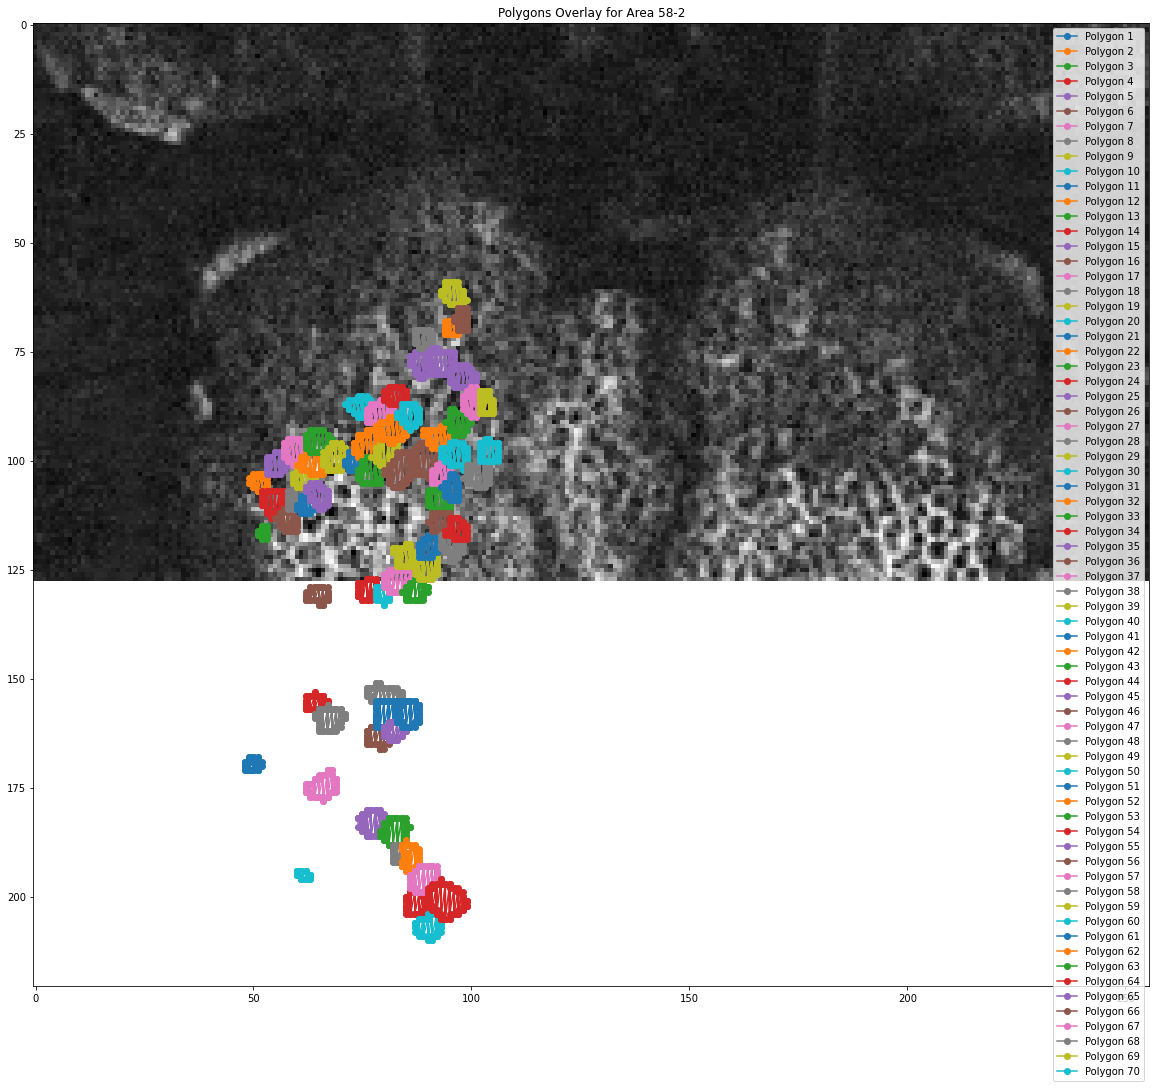

In [61]:

# Supongamos que "area" es un objeto que contiene la imagen y los polígonos.
# Se define una función para graficar.
def plot_image_with_polygons(area, key):
    # Redimensionar y mostrar la plantilla de la imagen
    resized_template = cv2.resize(area.template, (256, 128))

    # Configurar el gráfico
    plt.figure(figsize=(20, 20))
    plt.imshow(resized_template, cmap='gray')

    # Obtener los polígonos de "Hb"
    polygons = area.contours_small['Hb']

    # Iterar sobre cada polígono y graficarlo
    for idx, polygon in enumerate(polygons):
        # Los puntos del polígono deben ser en formato array([[x1, y1], [x2, y2], ...])
        x, y = polygon[:, 0], polygon[:, 1]  # Separar las coordenadas x e y
        plt.plot(x, y, marker='o', label=f'Polygon {idx + 1}')

    plt.title(f'Polygons Overlay for Area {key}')
    plt.legend()
    plt.show()

# Ejemplo de uso
# Supongamos que "areas[key]" es tu objeto area
your_area = areas[key]  # Asegúrate de reemplazar esto con la estructura adecuada
plot_image_with_polygons(your_area, key)


In [77]:
i=0
for testeo in area.contours_small['Hb']:
    if testeo[0][1]>125:
        i+=1
# area.contours_small['Hb'][0]
print(i)

76


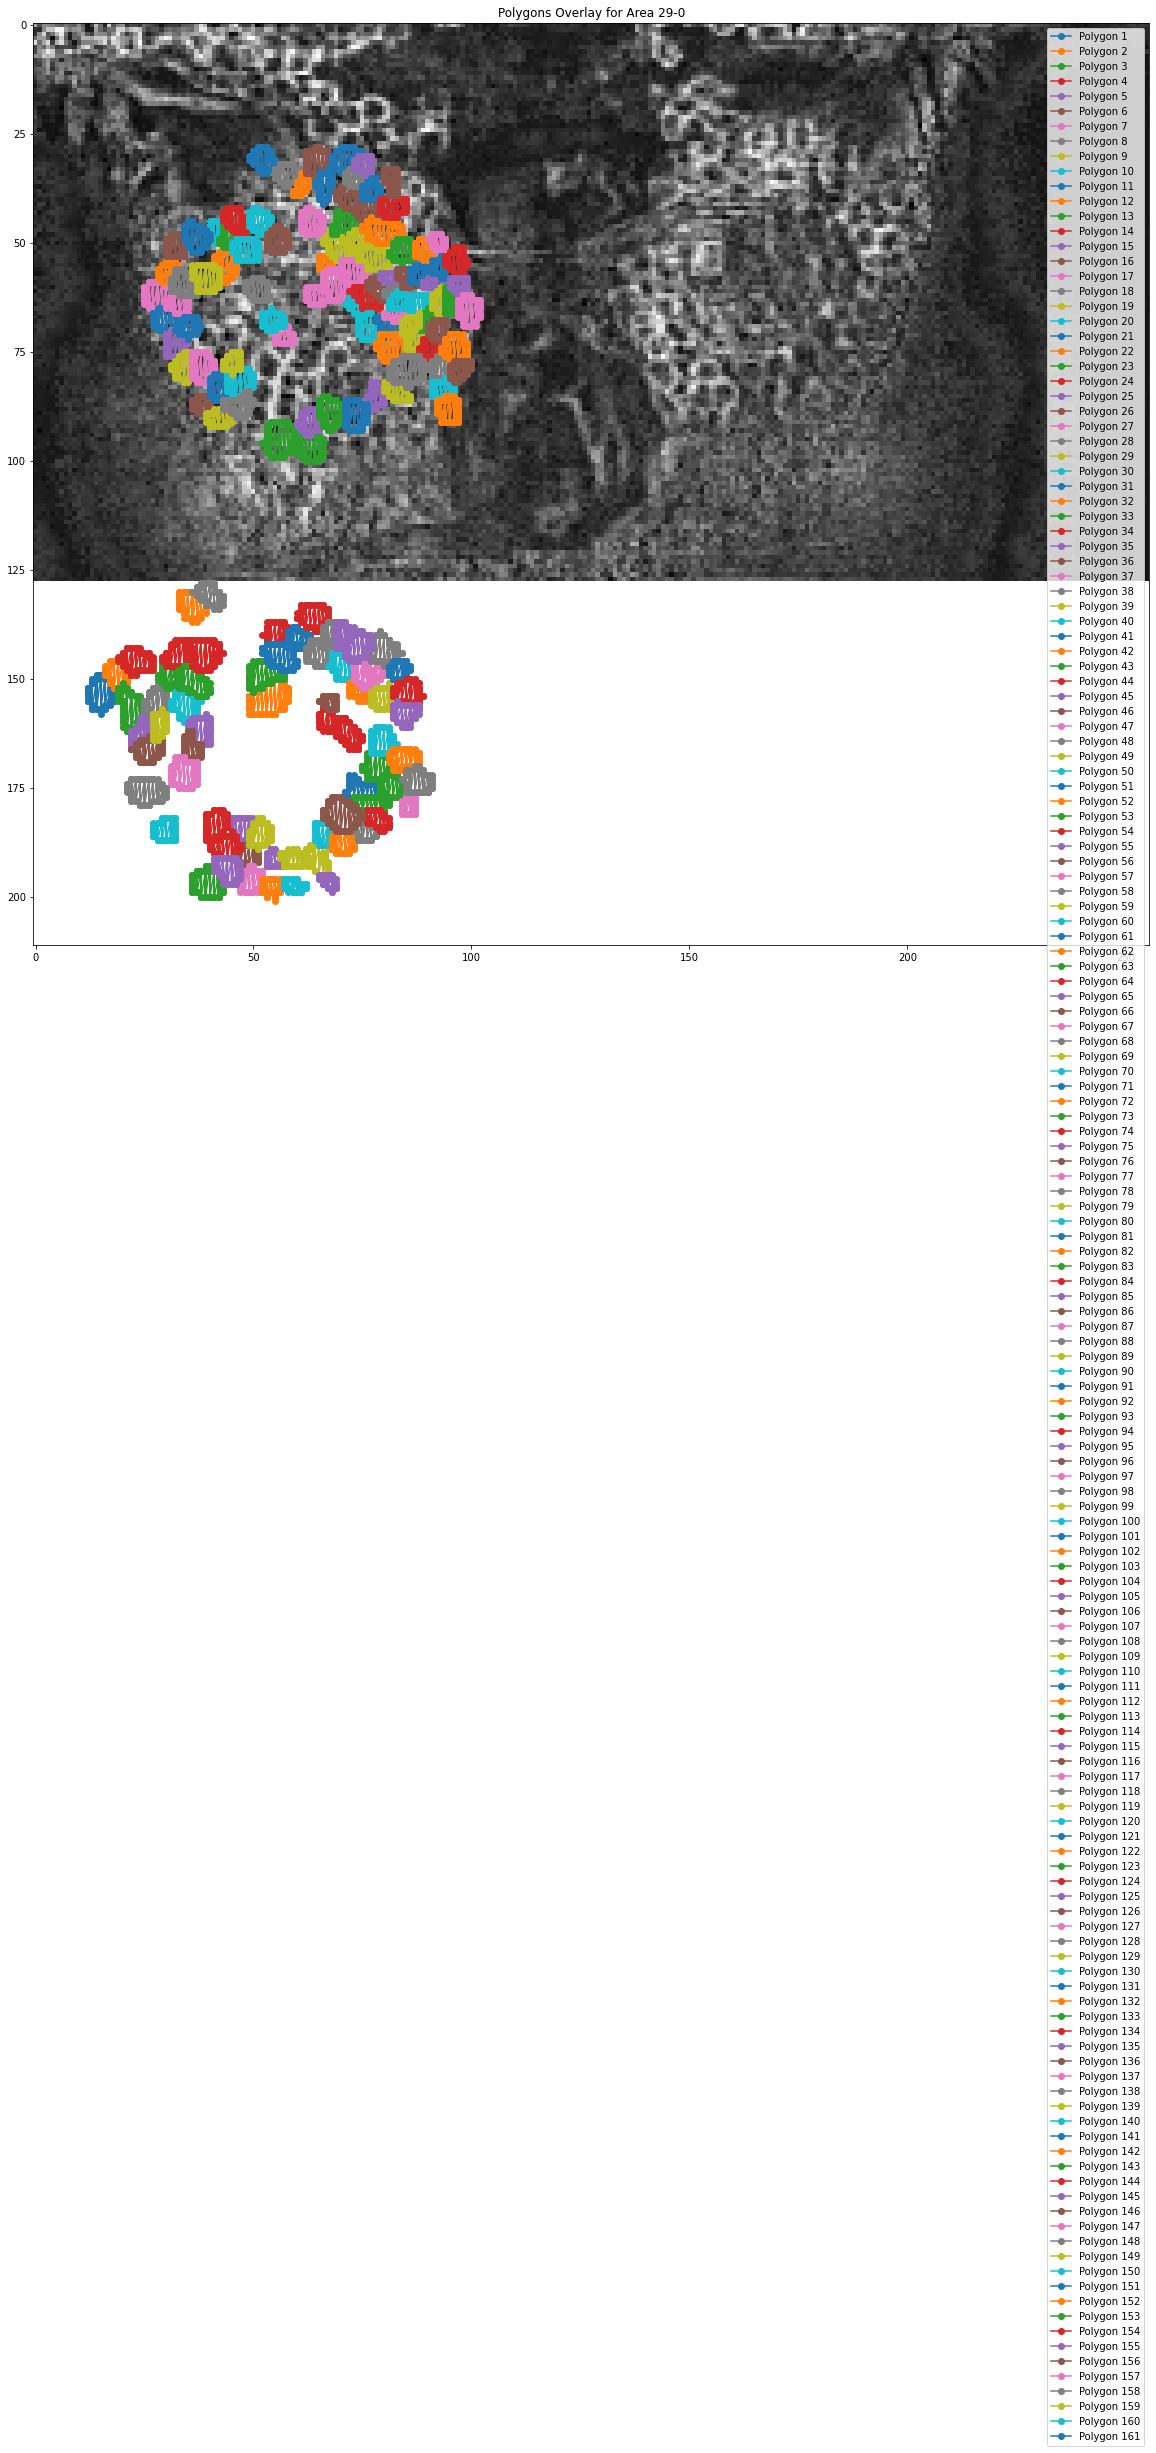

Número de píxeles dentro de los polígonos: 4787


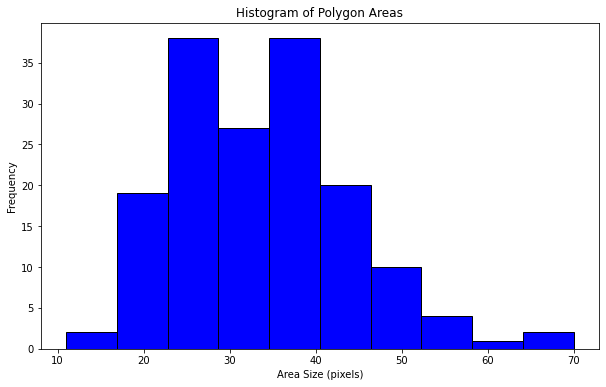

In [68]:
key='29-0'

# Supongamos que "area" es un objeto que contiene la imagen y los polígonos.
# Se define una función para graficar.
def plot_image_with_polygons(area, key):
    # Redimensionar y mostrar la plantilla de la imagen
    resized_template = cv2.resize(area.template, (256, 128))

    # Configurar el gráfico
    plt.figure(figsize=(20, 20))
    plt.imshow(resized_template, cmap='gray')

    # Obtener los polígonos de "Hb"
    polygons = area.contours_small['Hb']

    # Iterar sobre cada polígono y graficarlo
    for idx, polygon in enumerate(polygons):
        # Los puntos del polígono deben ser en formato array([[x1, y1], [x2, y2], ...])
        x, y = polygon[:, 0], polygon[:, 1]  # Separar las coordenadas x e y
        plt.plot(x, y, marker='o', label=f'Polygon {idx + 1}')

    plt.title(f'Polygons Overlay for Area {key}')
    plt.legend()
    plt.show()

def count_pixels_inside_polygons(area):
    # Crear una máscara del mismo tamaño que la imagen original
    mask = np.zeros(area.template.shape, dtype=np.uint8)

    # Obtener los polígonos de "Hb"
    polygons = area.contours_small['Hb']

    # Rellenar la máscara con los polígonos
    for polygon in polygons:
        cv2.fillPoly(mask, [polygon], color=1)  # color=1 para la máscara binaria

    # Contar los píxeles dentro de los polígonos (los píxeles donde la máscara es 1)
    pixel_count = np.count_nonzero(mask)

    return pixel_count

def plot_histogram_of_polygon_areas(area):
    # Obtener los polígonos de "Hb"
    polygons = area.contours_small['Hb']

    # Calcular el área de cada polígono en píxeles enteros
    areas = [cv2.countNonZero(cv2.fillPoly(np.zeros(area.template.shape, dtype=np.uint8), [polygon], color=1)) for polygon in polygons]

    # Graficar el histograma
    plt.figure(figsize=(10, 6))
    plt.hist(areas, bins=10, color='blue', edgecolor='black')
    plt.title('Histogram of Polygon Areas')
    plt.xlabel('Area Size (pixels)')
    plt.ylabel('Frequency')
    plt.show()

# Ejemplo de uso
# Supongamos que "areas[key]" es tu objeto area
your_area = areas[key]  # Asegúrate de reemplazar esto con la estructura adecuada
plot_image_with_polygons(your_area, key)
pixels_inside = count_pixels_inside_polygons(your_area)
print(f'Número de píxeles dentro de los polígonos: {pixels_inside}')
plot_histogram_of_polygon_areas(your_area)


29-0


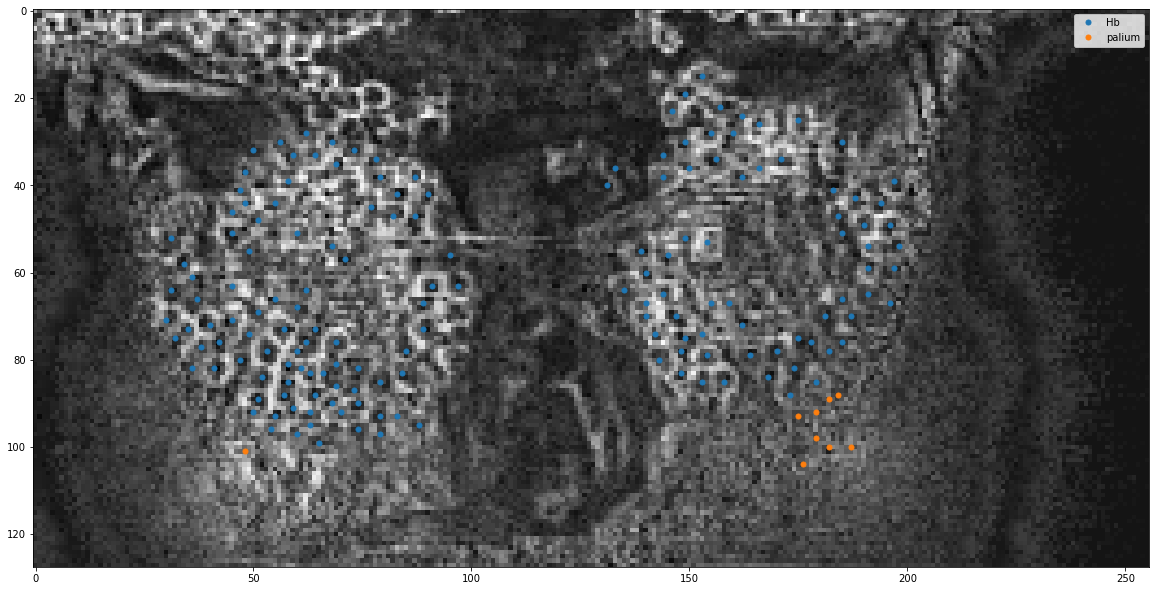

29-1


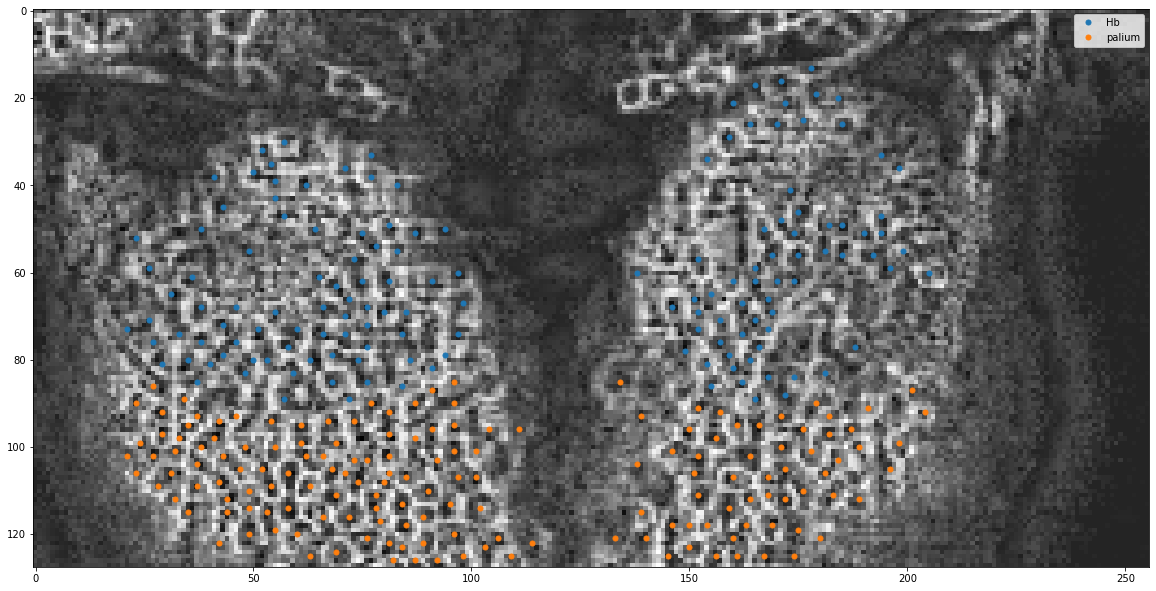

29-2


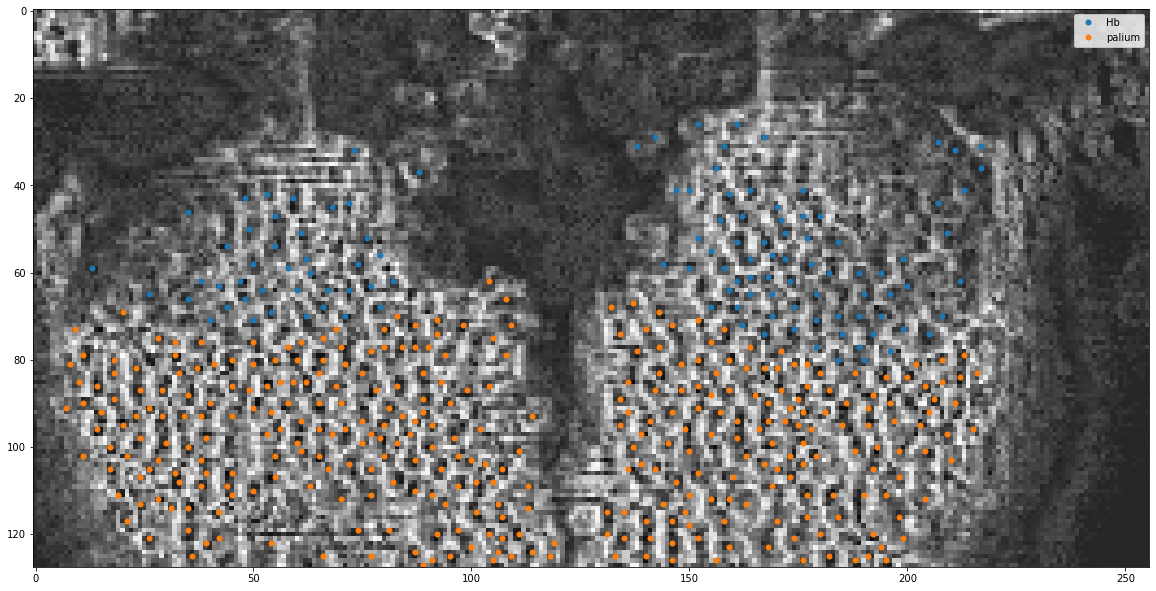

In [62]:
for key in areas:
    # if '28' not in key and '51' not in key:  
    if '29' in key :  
        print(key)
        area = areas[key]
        plt.figure(figsize=(20,20))
        plt.imshow(cv2.resize(areas[key].template , (256, 128)), cmap='gray')
        for subarea in area.centers_small:
            centers_small = area.centers_small[subarea]
            plt.plot(centers_small[:,0], centers_small[:,1], "o", label = subarea, markersize=5)
        area.polygons_per_area_small
        plt.legend()
        plt.show()

In [33]:
os.chdir(r'C:\Users\PC\Desktop\Analisis conf\PKL 11-2024')

# Código limpio final  


In [ ]:
# Importo librerías necesarias

# from ipynb.fs.defs.aux_functions import *
# import pandas as pd
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt
# from ipywidgets import interact

# Definición de rutas de trabajo

# Cambiar según las ubicaciones específicas

drive_dir = r"H:\My Drive\Valen Agulló\Habenula\Experimentos Violeta 2024"
disk_dir = r"C:\Users\PC\My Drive\Violeta"
data_dir = drive_dir + "Audiovisual Perception Optic Tectum - Confocal Calcium Imaging\Data"
areas_dir = disk_dir 
video_dir = disk_dir 
res_dir = areas_dir

# Cargo las tablas necesarias
dataset = pd.read_excel("Solo videos habenula 11_24.xlsx")
stack_info = pd.read_excel(r"Stacks y templados.xlsx")  # Adaptar si el archivo tiene múltiples hojas

# Convierto el dataset en objetos Trial
trials = load_dataset(dataset, verbose=False)

# Organizo los trials
factors = ["Exp", "Fecha", "Pez", "Area_num"]
sorted_t = sort_trials(trials, factors=factors, verbose=False)

stack_info = pd.read_excel(r"Stacks y templados.xlsx")  # Adaptar si el archivo tiene múltiples hojas

# Filtrar solo los registros que tienen "templado" en la columna de registro
stack_info = stack_info[stack_info["registro"].str.contains("templado", na=False)]
stack_spacing = stack_info.set_index("animal")["espaciado"]  # Asegúrate de que 'animal' y 'espaciado' sean las columnas correctas
stack_base = stack_info.set_index("animal")["z"]  # Asegúrate de que 'animal' y 'espaciado' sean las columnas correctas

# Filtrar los trials para el experimento Hab_Zs_1Hs
# filtered_trials = [trial for trial in trials if trial.data['Exp']== "Hab_Zs_1Hs"]
sorted_t = sort_trials(trials, factors=factors, verbose=False)

# Inicializar region_list para cada trial
for trial in trials:
    region_list = trial.region.split("+")
    trial.region_list = region_list

# Modifico el código para manejar 3 alturas por czi
areas = {}

for exp, dates in sorted_t.items():
    if exp == "Hab_Zs_1Hs":
        for date, fish in dates.items():
            for pez, areas_dict in fish.items():
                for area_num, trial_list in areas_dict.items():
                    # Iterar para cada una de las 3 alturas
                    base = stack_base[pez]
                    for altura in range(3):
                        delta_z = stack_spacing[pez] * altura
                        area_key = f"{pez}-{altura}"

                        # Crear el objeto Area y ajustar el z relativo
                        areas[area_key] = Area(pez, area_num)
                        areas[area_key].set_trials(trial_list)
                        areas[area_key].z = base + delta_z
                        areas[area_key].n = altura

                        # # Establecer el z relativo ajustado
                        # for trial in areas[area_key].trials:
                        #     trial.data['Delta_planos'] += delta_z



# Asocio templados y regiones
for exp, dates in sorted_t.items():
    if exp == "Hab_Zs_1Hs":
        for date, fish in dates.items():
            for pez, areas_dict in fish.items():
                for area_num, trial_list in areas_dict.items():
                    templado_dir = r"C:\Users\PC\Desktop\Mascaras templados"

                    for altura in range(3):
                        # Formato del archivo de templado
                        templado_filename = f"{pez}_NeuroD_templados-01_{altura}-O0.png"
                        templado_path = os.path.join(templado_dir, templado_filename)

                        if os.path.exists(templado_path):
                            # Cargar el templado
                            templado = cv2.imread(templado_path, cv2.IMREAD_GRAYSCALE)

                            # Generar la clave del área
                            key = f"{pez}-{altura}"

                            if key in areas:
                                # Ajustar la plantilla según altura
                                areas[key].set_template(templado, factor=4)
                            else:
                                print(f"Advertencia: No se encontró el área para la clave {key}.")
                        else:
                            print(f"Archivo templado no encontrado: {templado_path}")

# Visualización de las plantillas ajustadas
for key in areas:
    area = areas[key]
    plt.figure(figsize=(6, 6))
    plt.imshow(area.template, cmap="gray")
    plt.title(f"Area: {key}")
    plt.show()


In [103]:
areas['28-0'].__dict__.keys()

dict_keys(['pez', 'n', 'trials', 'template', 'polygons_per_area', 'subtemplates', 'fecha', 'x', 'y', 'z', 'regions', 'template_small', 'factor', 'grids', 'contours', 'centers', 'contours_small', 'centers_small', 'polygons_per_area_small', 'midline_points'])

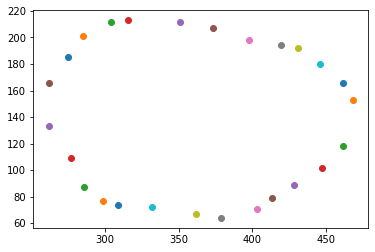

In [ ]:
for j in areas['28-0'].polygons_per_area[''][1]:
    plt.scatter(j[0], j[1])